In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import AgglomerativeClustering
from fuzzywuzzy import fuzz, process
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [106]:
df = pd.read_excel("Data SESAME.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Prénom usuel                                  647 non-null    object 
 1   Prénom                                        646 non-null    object 
 2   Nom                                           647 non-null    object 
 3   Sexe                                          647 non-null    object 
 4   Age                                           646 non-null    float64
 5   Région d'origine                              647 non-null    object 
 6   Ville d'origine                               647 non-null    object 
 7   Promotion                                     647 non-null    object 
 8   Seriation                                     647 non-null    object 
 9   Association                                   93 non-null     obj

# Correction des erreurs de typographie dans la colonne Ville d'Origine

In [107]:
villes = df['Ville d\'origine']
villes_correctes= ["Ambanja", "Ambatolampy", "Ambilobe", "Ambohidratrimo", "Ambositra",
                   "ANALALAVA", "Andavadoaka", "Andilamena","Anivorano", "Antalaha",
                   "Antananarivo", "Antananarivo Antsimondrano", "Antsalova", "Antsirabe",
                   "Antsiranana", "Antsohihy", "Bemaneviky", "Betafo", "Brickaville",
                   "Efoetse", "Farafangana", "Faratsiho", "Fenerive-Est", "Fianarantsoa",
                   "Fianarantsoa I", "Fort dauphin", "Ihosy", "MAEVATANANA", "Mahajanga",
                   "Mahanoro", "Maintirano", "Mampikony", "Manakara", "Mananjary",
                   "Mandritsara", "Marovoay", "Miandrivazo", "Miarinarivo", "Moramanga",
                   "Morombe", "Morondava", "Morondava Centre", "NOSY BE", "Nosy Varika",
                   "Port-Bergé", "Sambava", "Soanierana Invongo", "Talata Volonondry", "Toamasina",
                   "Toliara", "Tsiroanomandidy", "Tuléar", "Tuléar I", "Vatomandry", "Vohipeno"]


In [108]:
def trouver_correspondance_ville(ville, villes_correctes):
    correspondance_score = -1  # Score de correspondance initial
    correspondance = None  # Ville correspondante initiale
# Parcourez toutes les villes connues
    for ville_connue in villes_correctes:
        score = fuzz.ratio(ville, ville_connue)  # Calculez le score de correspondance
        if score > correspondance_score:  # Si le score est meilleur que le précédent meilleur score
            correspondance_score = score  # Mettez à jour le score de correspondance
            correspondance = ville_connue  # Mettez à jour la correspondance

    return correspondance

In [109]:
# Appliquez la fonction pour corriger les noms de villes dans le DataFrame
df['Ville d\'origine'] = df['Ville d\'origine'].apply(lambda x: trouver_correspondance_ville(str(x), villes_correctes))

In [110]:
#Suppression des données manquantes 
df.dropna(subset=["Ville d'origine"], inplace=True)

statistiques_ville_origine = donnees_mention_S.groupby('Ville d\'origine')['Classement S1'].describe()
print(statistiques_ville_origine)

# Encodage de la colonne Ville d'origine avec la méthode One Hot 

In [111]:
ville_origine = df['Ville d\'origine']
encoder = LabelBinarizer()
encoder_region = encoder.fit_transform(ville_origine)
print(encoder_region)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Correction des erreurs de typographie dans la colonne Région d'origine


In [112]:
regions = df['Région d\'origine']
regions_correctes= ["Fitovinany", "Atsimo Andrefana", "Menabe", "Haute Matsiatra", "Vakinankaratra", "Boeny", "SAVA", "Tsiroanomandidy", "Atsimo-Andrefana", "Sofia", "Ihorombe", "Itasy","Antsinanana", "Vatovavy", "Analanjirofo", "Alaotra Mangoro", "Atsimo Atsinanana", "Melaky", "DIANA", "Anosy", "Bongolava", "Amoron'i Mania", "BETSIBOKA"]

In [113]:
def trouver_correspondance(region):
    if isinstance(region, str):  # Vérifier si la valeur est une chaîne de caractères
        correspondance = process.extractOne(region, regions_correctes, scorer=fuzz.token_set_ratio)
        if correspondance[1] >= 90:  # Ajustez le seuil en fonction de la similarité souhaitée
            return correspondance[0]
    return region  # Si ce n'est pas une chaîne de caractères, retournez la valeur d'origine

In [114]:
#Application des corrections au fichier
regions_corrigees = regions.apply(trouver_correspondance)

In [115]:
df['Région d\'origine'] = regions_corrigees

# Encodage de la colonne Région d'origine par One Hot

In [116]:
region_origine = df['Région d\'origine']

In [117]:
#J'ai décidé de remplacer les lignes manquante ou de valeur zero par la ville qui se répète le plus
#Identification du nom de la ville répétitif
region_statistique = df['Région d\'origine'].mode()[0]

#Remplacement
df['Région d\'origine'].fillna(region_statistique, inplace=True)
df['Région d\'origine'].replace(0,region_statistique, inplace=True)

df.to_excel("Data SESAME.xlsx", index=False)


In [118]:
#Encodage de la colonne région d'origine
encoder = LabelBinarizer()
encoder_region = encoder.fit_transform(df['Région d\'origine'])
print (encoder_region)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Division en 2 groupes: DATA L et S

In [119]:

# Séparation des données pour la mention "S"
donnees_mention_S = df[df['Seriation'] == 'S']

# Séparation des données pour la mention "L"
donnees_mention_L = df[df['Seriation'] == 'L']

In [120]:
donnees_mention_L.head()

,Prénom usuel,Prénom,Nom,Sexe,Age,Région d'origine,Ville d'origine,Promotion,Seriation,Association,...,THERMO,OPTANG,OPTINFO,MATHFI Option,CC S2,Cti S2,Moyenne générale S2,CR-UE S2,CR-S S2,Classement S2
0,Andréa,Marie Andréa,TEFINANAHARY,F,17.8,Fitovinany,Manakara,P15,L,NaN,...,NaN,NaN,NaN,NaN,7.547917,7.205208,9.240625,21,21,5
1,Aurella,Amine Aurella,SOAVELO,F,16.6,Fitovinany,Manakara,P15,L,NaN,...,NaN,NaN,NaN,NaN,5.166667,6.25625,7.095083,8,8,18
2,Bella,Marina Bella,TSIPY,F,17.8,Atsimo Andrefana,Tuléar,P15,L,NaN,...,NaN,NaN,NaN,NaN,6.76875,7.053125,8.307708,13,13,7
3,Fabienne,Mahatratsy Jeanne Fabienne,MANAMPISOA,F,17.4,Atsimo Andrefana,Tuléar,P15,L,NaN,...,NaN,NaN,NaN,NaN,6.789583,5.875,7.7575,16,16,13
4,Fenosoa,Fenosoa Tanjona Robert,RAKOTOARIVONY,G,18.0,Analamanga,Antananarivo,P15,L,NaN,...,NaN,NaN,NaN,NaN,6.6875,5.872917,7.795417,18,18,12


#Desciption statistiques des S

In [121]:
# Statistiques descriptives pour la mention "S"
print("Statistiques descriptives pour la mention 'S':")
print(donnees_mention_S.describe())


Statistiques descriptives pour la mention 'S':
              Age  Activités numériques      Chimie  S'informer  \
count  383.000000            335.000000  335.000000  335.000000   
mean    18.254569              9.582554   10.083066   11.044177   
std      1.073856              2.702369    2.432326    2.022338   
min     14.100000              3.300000    2.220000    5.133333   
25%     17.600000              7.844231    8.387500    9.926106   
50%     18.300000              9.411250   10.318750   11.153846   
75%     19.000000             11.262187   11.656250   12.296779   
max     21.500000             18.240000   17.150000   16.364750   

       Informer et raconter  Français des sciences  Physiologie humaine  \
count            335.000000             335.000000           335.000000   
mean              12.463967              10.961195            10.263425   
std                2.325006               1.920189             2.073313   
min                4.600000               6.00000

#Desciption statistiques des L

In [122]:
# Statistiques descriptives pour la mention "L"
print("Statistiques descriptives pour la mention 'L':")
print(donnees_mention_L.describe())

Statistiques descriptives pour la mention 'L':
              Age  Activités numériques  Chimie  S'informer  \
count  263.000000                   0.0     0.0         0.0   
mean    18.130147                   NaN     NaN         NaN   
std      1.554506                   NaN     NaN         NaN   
min      0.000000                   NaN     NaN         NaN   
25%     17.500000                   NaN     NaN         NaN   
50%     18.100000                   NaN     NaN         NaN   
75%     18.900000                   NaN     NaN         NaN   
max     21.300000                   NaN     NaN         NaN   

       Informer et raconter  Français des sciences  Physiologie humaine  \
count                   0.0                    0.0                  0.0   
mean                    NaN                    NaN                  NaN   
std                     NaN                    NaN                  NaN   
min                     NaN                    NaN                  NaN   
25%       

# Suppression des colonnes non pertinentes pour chaque sous DataFrame

In [123]:
#Suppression des colonnes non pertinentes pour le DataFrame des S
colonnes_a_supprimer_S = ['Français, Langue de l\'enseignement supérieur', 'Informer et raconter.1', 
                          'Comprendre le monde contemporain ', 'S\'informer.1','Activités numériques','Informatique.1',
                          'Informatique.1', 'Options 1', 'Habiter Antananarivo','Expliquer et argumenter', "Comprendre \"l'énigme malgache\"", 
                           'Génération', 'Esprit de synthèse', 'Statistiques','Philo-Politique', 'Littérature francophone', 
                            'Optionnel anglais', 'Eco-gé', 'Malagasy', 'Mathématique financière' ]
donnees_mention_S = donnees_mention_S.drop(colonnes_a_supprimer_S, axis=1)


In [124]:
print(donnees_mention_S.head())

   Prénom usuel             Prénom               Nom Sexe   Age  \
22       Andréa      Hélène Andréa       ZAFISOALINE    F  19.2   
23      Berthin  Bevahiny Berthin   RAFAMANTANANTSOA    G  21.5   
24     Berthine           Berthine      RAZAFIARISOA    F  19.6   
25      Claudia            Claudia       NDALAMALALA    F  19.0   
26       Désiré      Désiré Alfred   RANDRIANARIVELO    G  17.3   

    Région d'origine Ville d'origine Promotion Seriation Association  ...  \
22        Analamanga    Antananarivo       P15         S         NaN  ...   
23    Vakinankaratra    Fianarantsoa       P15         S         NaN  ...   
24            Menabe     Miandrivazo       P15         S         NaN  ...   
25  Atsimo Andrefana          Tuléar       P15         S         NaN  ...   
26             Boeny       Mahajanga       P15         S         NaN  ...   

   THERMO OPTANG  OPTINFO  MATHFI Option    CC S2     Cti S2  \
22    NaN    NaN      NaN            NaN  2.770833  3.973958   
23    

In [125]:
#Suppression des colonnes non pertinentes pour le DataFrame des L
colonnes_a_supprimer_L = ['Géométrie affine', 'Géologie', 'Français des science et techniques', 'Expliquer et argumenter.1',
                          'Histoire des sciences et des techniques',
                           'Mécanique générale', 'Electromagnétisme', 'ECOTECHNOBIO', 'THERMO', 'OPTANG', 'OPTINFO', 'MATHFI Option' ]
donnees_mention_L = donnees_mention_L.drop(colonnes_a_supprimer_L, axis=1)

In [126]:
print(donnees_mention_L.head())

  Prénom usuel                      Prénom            Nom Sexe   Age  \
0       Andréa                Marie Andréa   TEFINANAHARY    F  17.8   
1      Aurella               Amine Aurella        SOAVELO    F  16.6   
2        Bella                Marina Bella          TSIPY    F  17.8   
3     Fabienne  Mahatratsy Jeanne Fabienne     MANAMPISOA    F  17.4   
4      Fenosoa      Fenosoa Tanjona Robert  RAKOTOARIVONY    G  18.0   

   Région d'origine Ville d'origine Promotion Seriation Association  ...  \
0        Fitovinany        Manakara       P15         L         NaN  ...   
1        Fitovinany        Manakara       P15         L         NaN  ...   
2  Atsimo Andrefana          Tuléar       P15         L         NaN  ...   
3  Atsimo Andrefana          Tuléar       P15         L         NaN  ...   
4        Analamanga    Antananarivo       P15         L         NaN  ...   

  Optionnel anglais Eco-gé  Malagasy  Mathématique financière    CC S2   \
0               NaN    NaN       Na

# Visualisation données numerique
# Nettoyage

<Axes: >

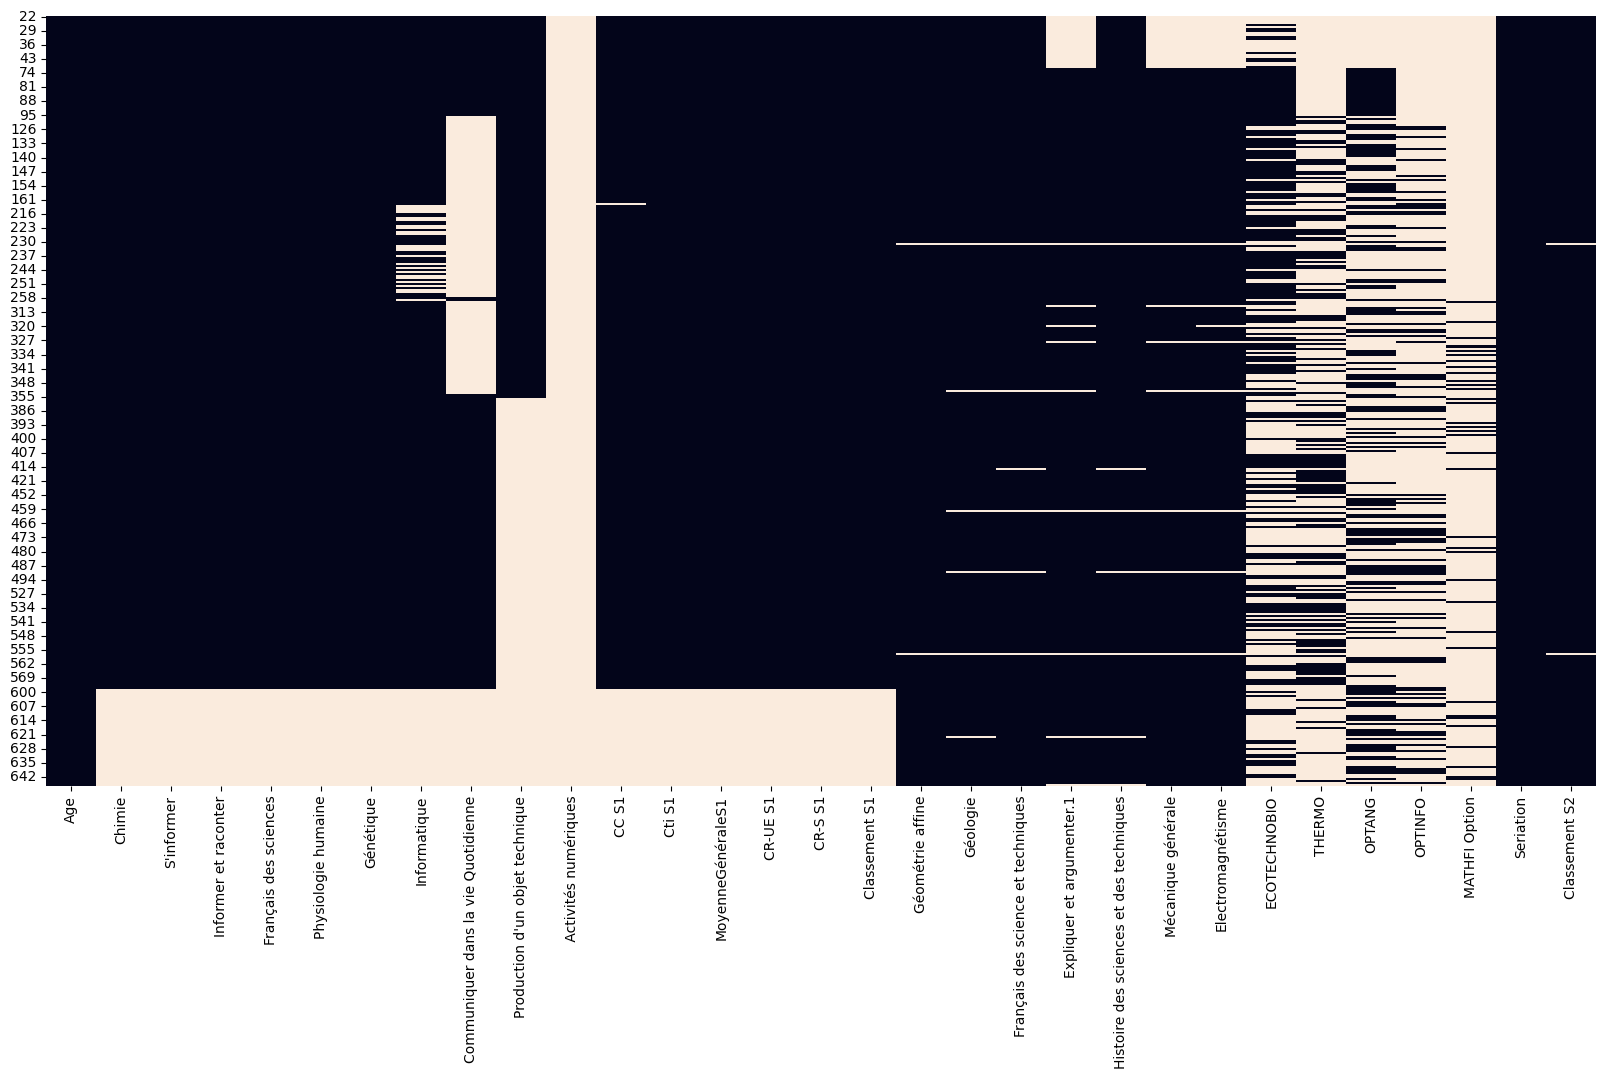

In [127]:
# Les valeurs numerique seulement
donnees_mention_S_numerical = donnees_mention_S.select_dtypes(include=[float, int]).copy()

donnees_mention_S_numerical["Seriation"] = donnees_mention_S["Seriation"].copy()
donnees_mention_S_numerical["Classement S2"] = donnees_mention_S["Classement S2"].copy()

plt.figure(figsize=(20, 10))
sns.heatmap(
    donnees_mention_S_numerical.isna(),
    cbar=False,
)

<Axes: >

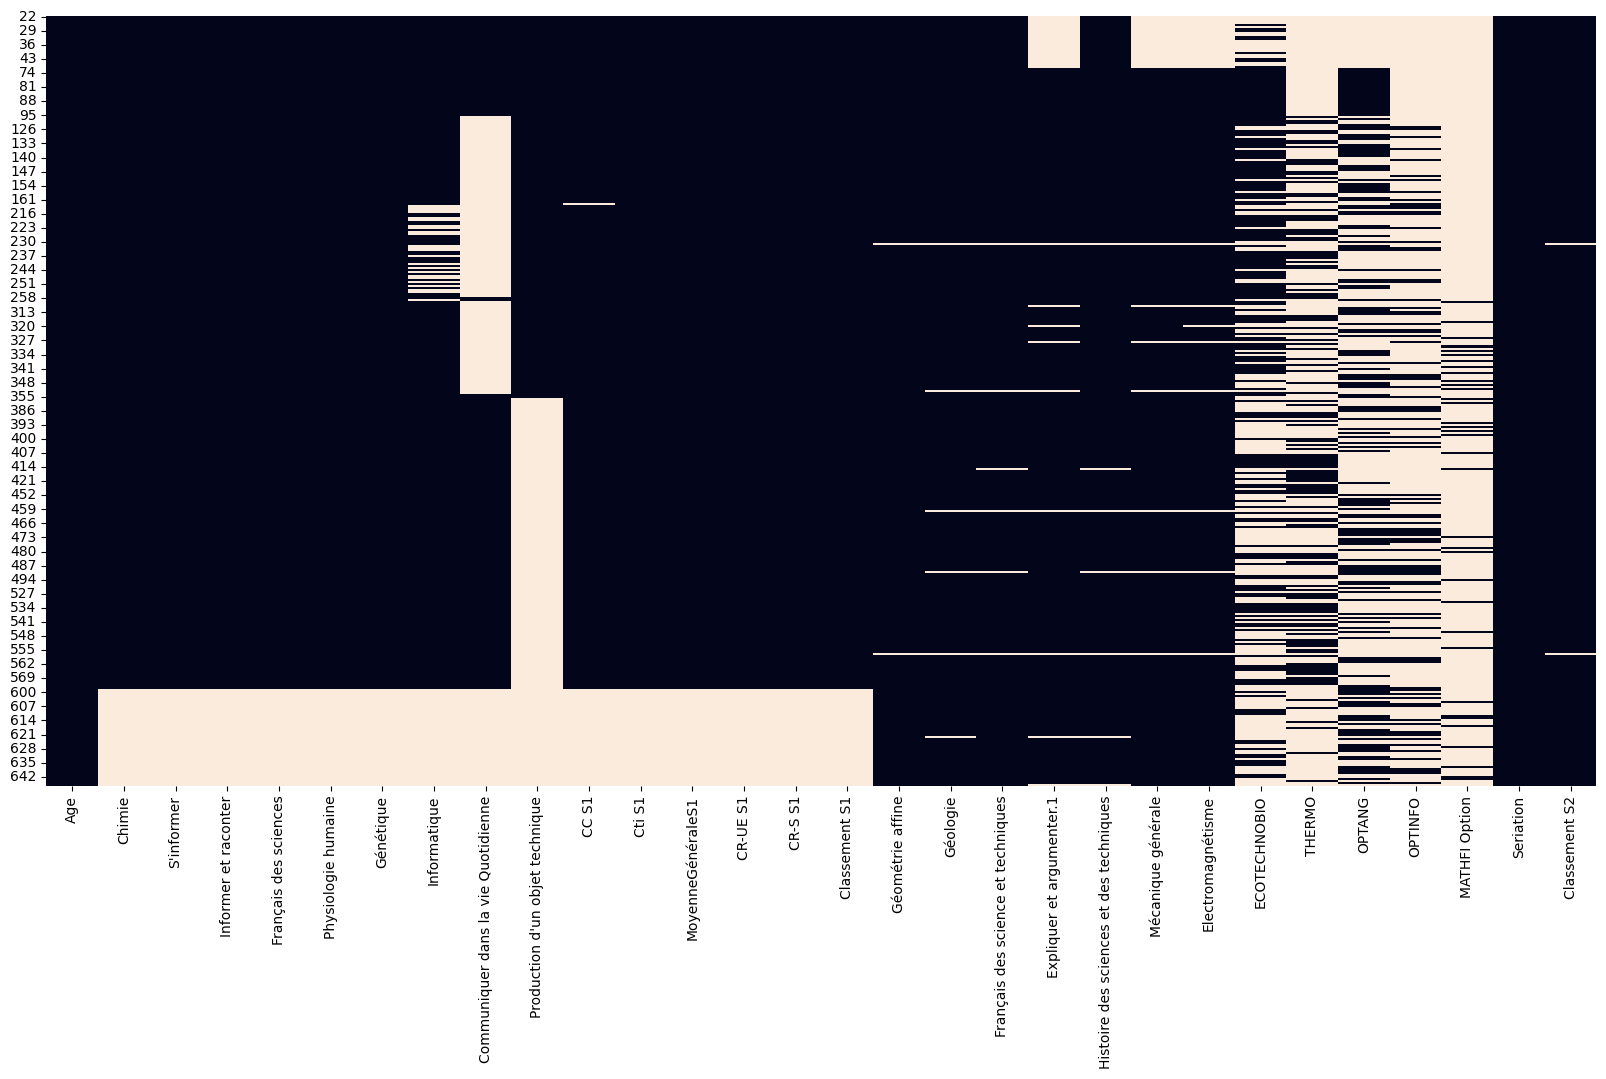

In [128]:
# supprimer des colonnes avec plus de 25% de valeurs manquantes
plt.figure(figsize=(20, 10))
donnees_mention_S_numerical = donnees_mention_S_numerical.dropna(thresh=0.5, axis=1)
sns.heatmap(
donnees_mention_S_numerical.isna(),
cbar=False
)

<Axes: >

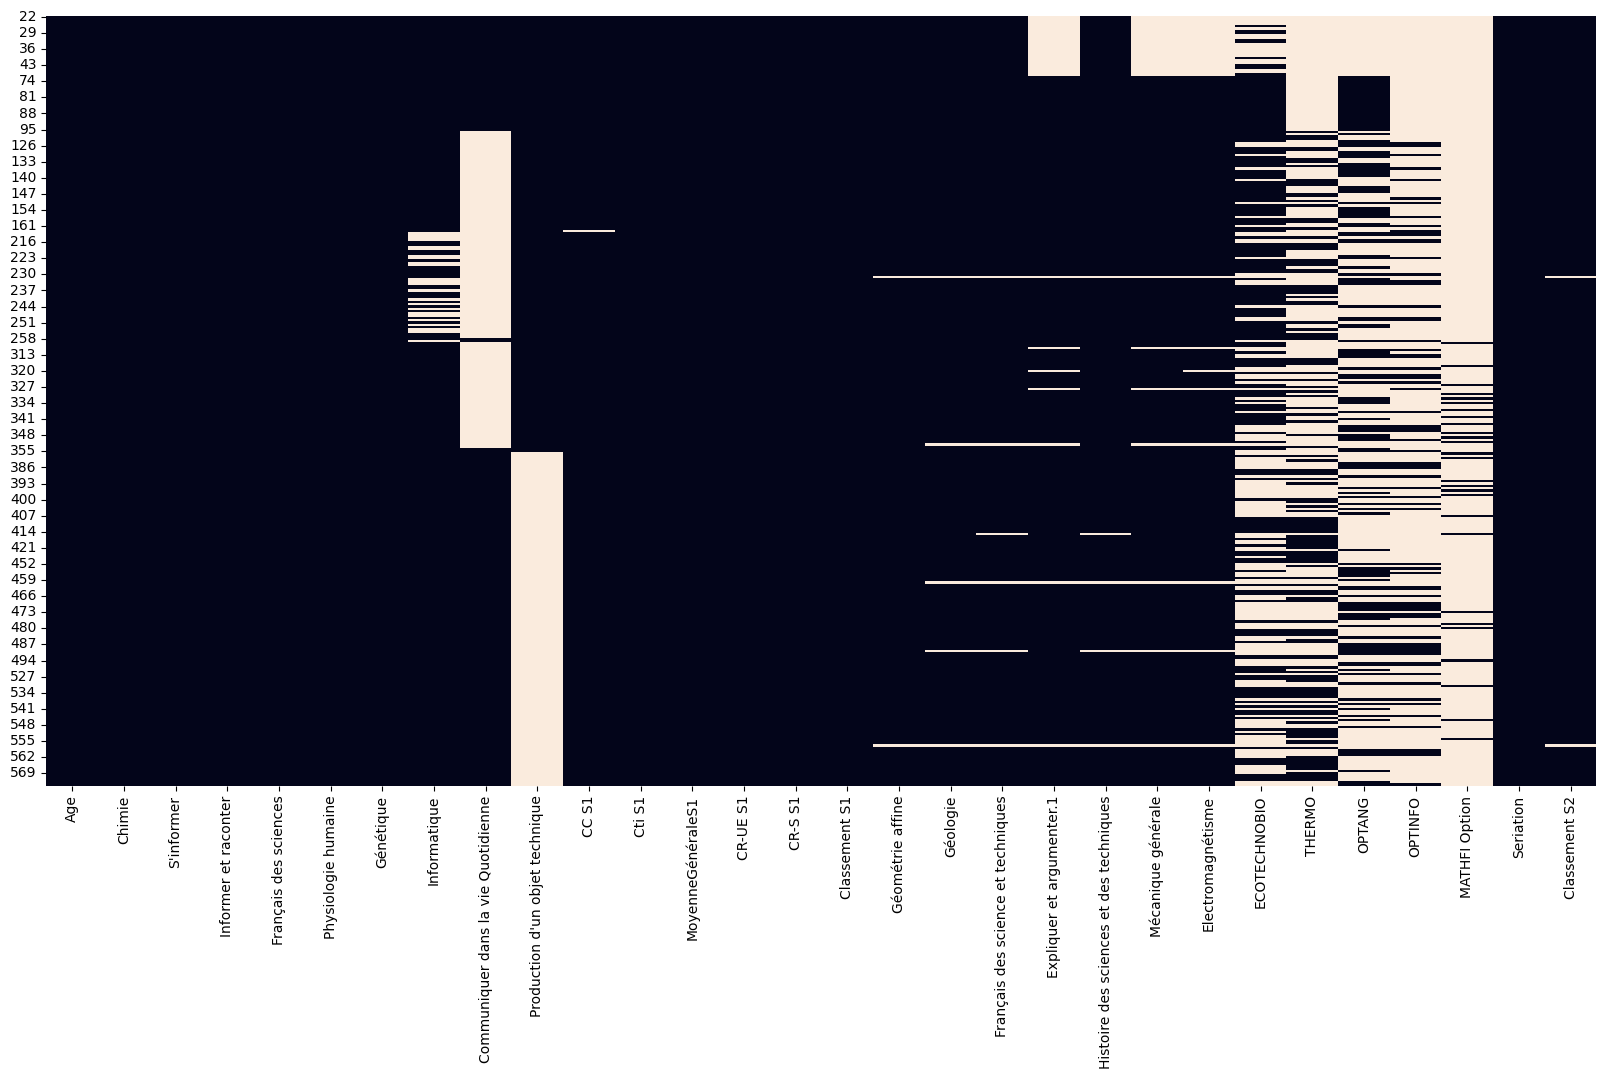

In [129]:
#Suprression des lignes avec bcp de vides
# Calculer le seuil minimal de valeurs non manquantes pour l'ensemble du DataFrame
seuil_minimal = len(donnees_mention_S_numerical.columns) * 0.5  # Par exemple, 50%

# Utiliser une condition de filtrage pour identifier les lignes à supprimer
condition_a_supprimer = donnees_mention_S_numerical.isna().sum(axis=1) > seuil_minimal

# Utiliser la condition de filtrage pour supprimer les lignes
donnees_mention_S_numerical = donnees_mention_S_numerical[~condition_a_supprimer]
plt.figure(figsize=(20, 10))
sns.heatmap(
donnees_mention_S_numerical.isna(),
cbar=False
)

<Axes: >

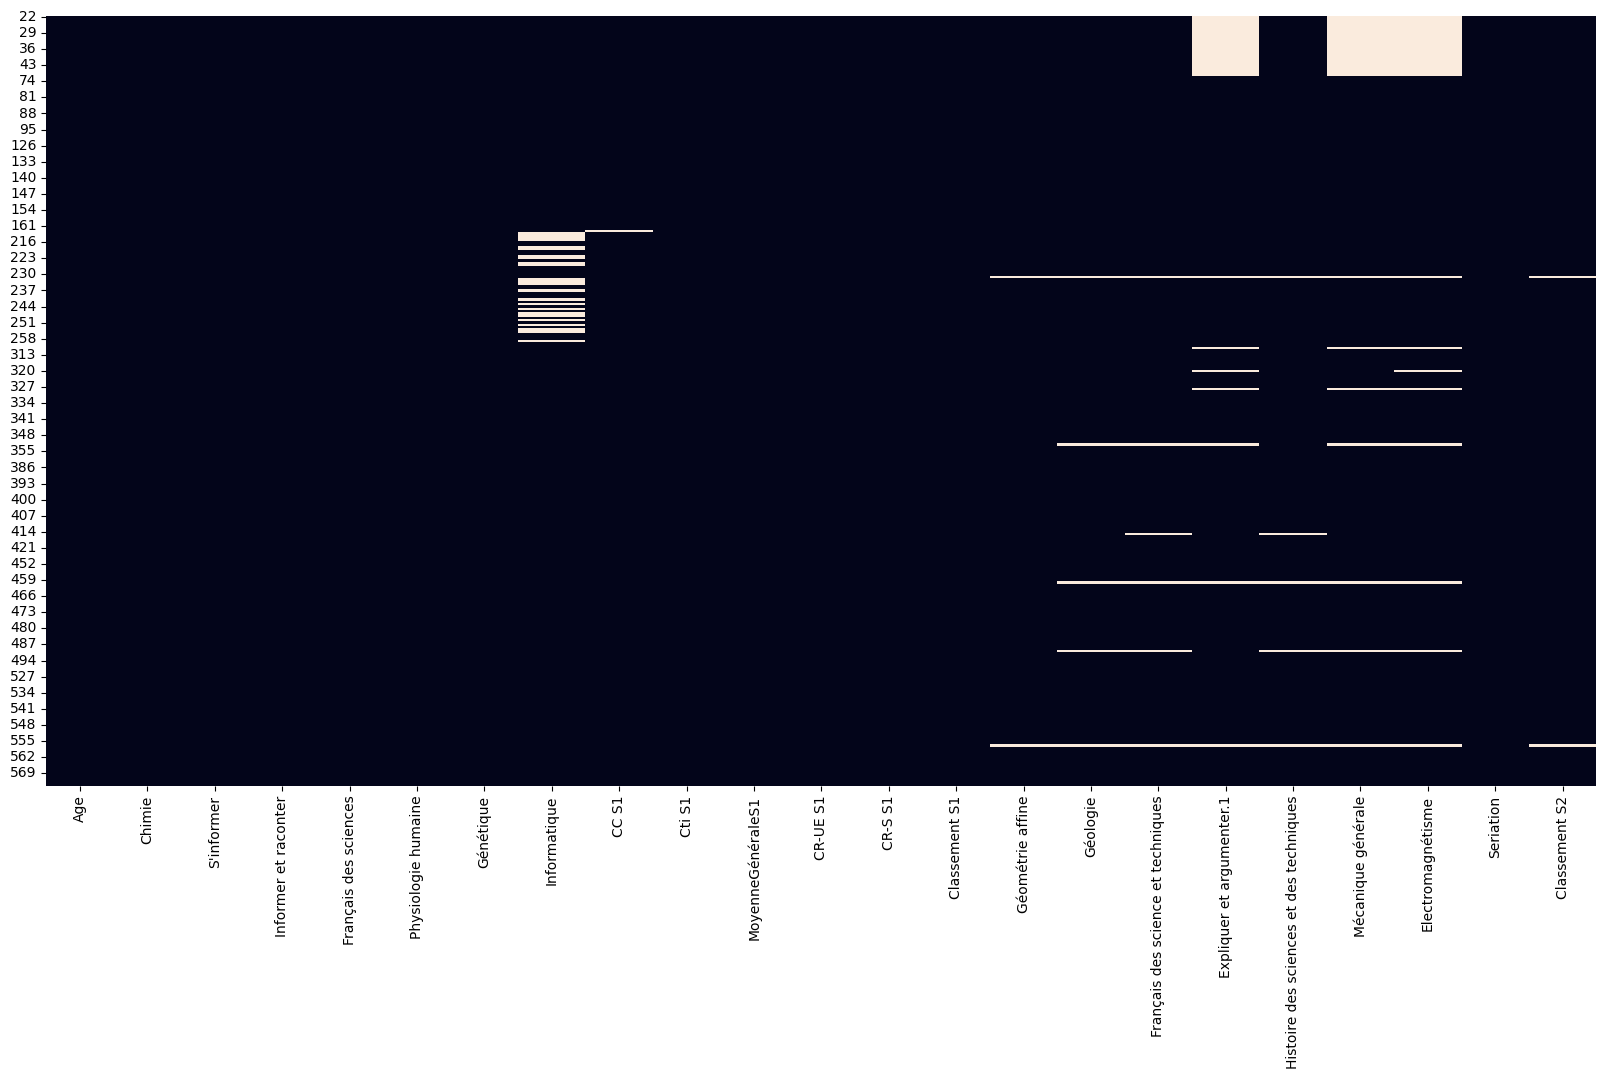

In [130]:
#Suppression de plusieurs colonnes
plt.figure(figsize=(20, 10))
colonnes_a_supprimer_S_numerical = ['Communiquer dans la vie Quotidienne', 'Production d\'un objet technique', 'ECOTECHNOBIO'
                                    ,'THERMO','OPTANG','OPTINFO','MATHFI Option'] 
donnees_mention_S_numerical = donnees_mention_S_numerical.drop(colonnes_a_supprimer_S_numerical, axis = 1)
sns.heatmap(
donnees_mention_S_numerical.isna(),
cbar=False
)

<Axes: >

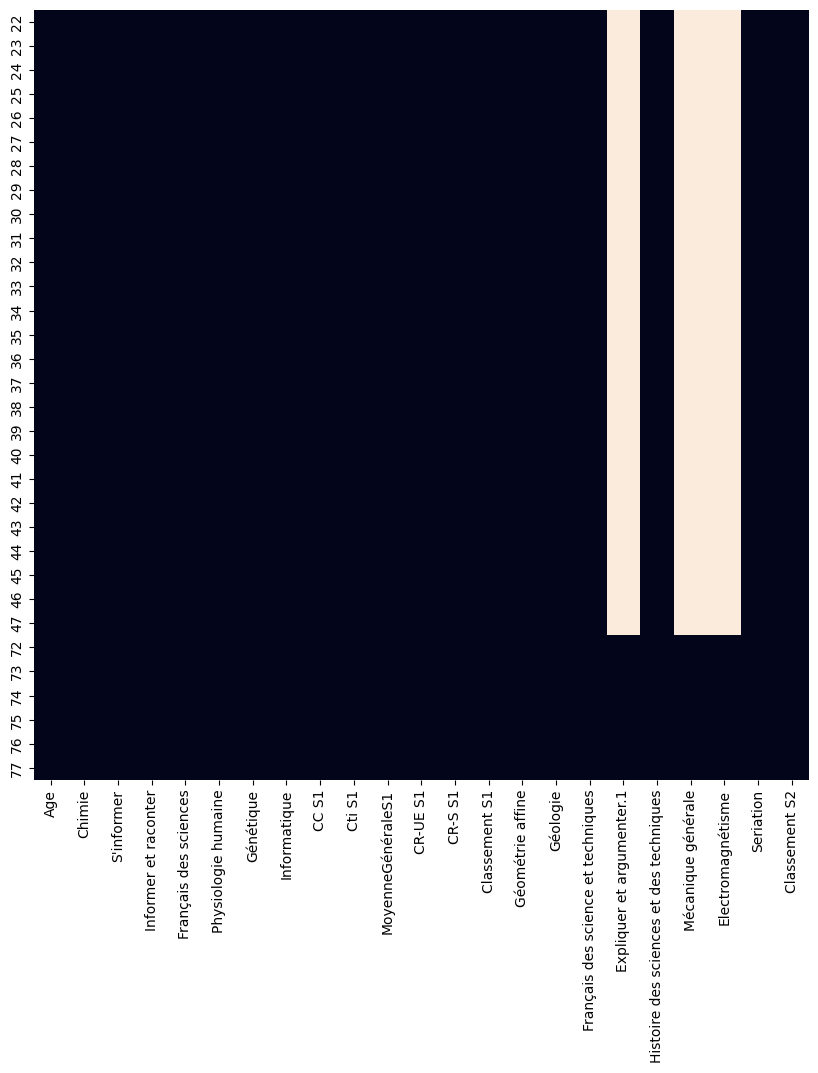

In [131]:
#Ectraction de la partie avec le bloc vide
# Remplacez "df" par le nom de votre DataFrame
colonnes_specifiques = ["Expliquer et argumenter.1", "Mécanique générale", "Electromagnétisme"]
# Recherchez le nombre de lignes vides au début
nombre_lignes_vides = donnees_mention_S_numerical[colonnes_specifiques].isna().all(axis=1).sum()

# Utilisez "iloc" pour extraire les lignes correspondantes
nouveau_dataframe = donnees_mention_S_numerical.iloc[:nombre_lignes_vides, :]
plt.figure(figsize=(10, 10))
sns.heatmap(
nouveau_dataframe.isna(),
cbar=False
)

<Axes: >

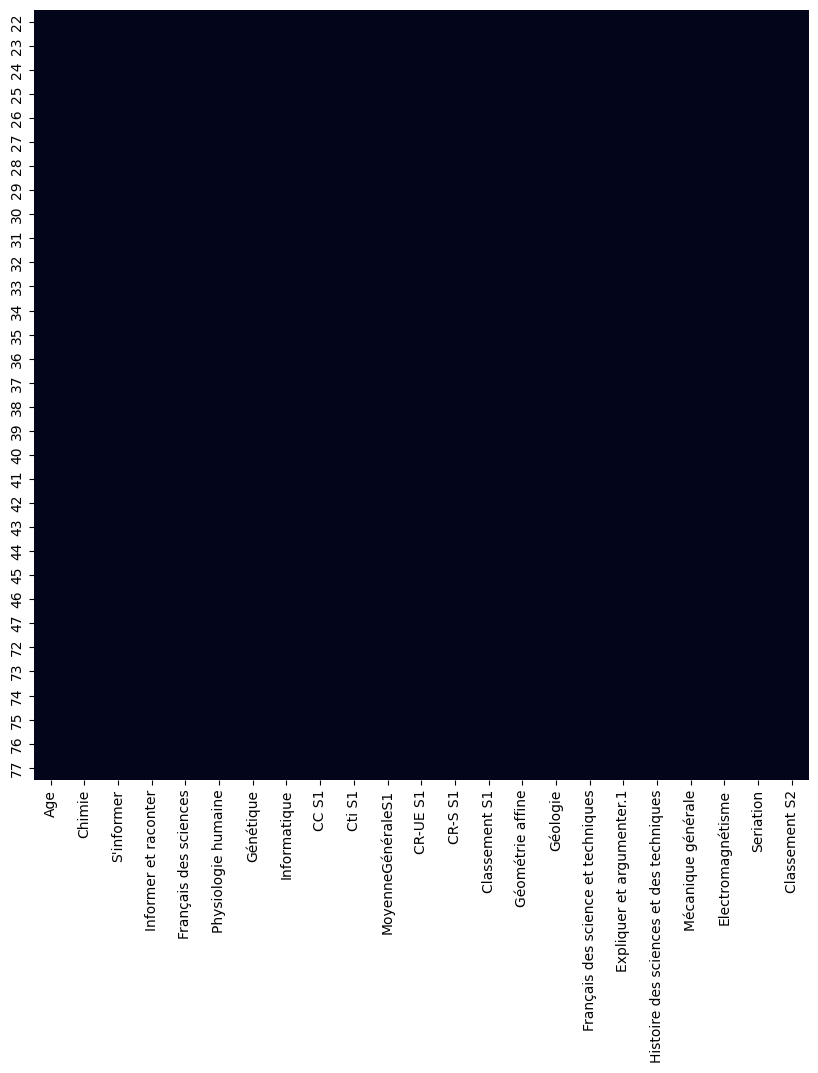

In [132]:
# Remplacement des données vides par -1 dans le nouveau DataFrame
nouveau_dataframe = nouveau_dataframe.fillna(-1)
plt.figure(figsize=(10, 10))
sns.heatmap(
nouveau_dataframe.isna(),
cbar=False
)

<Axes: >

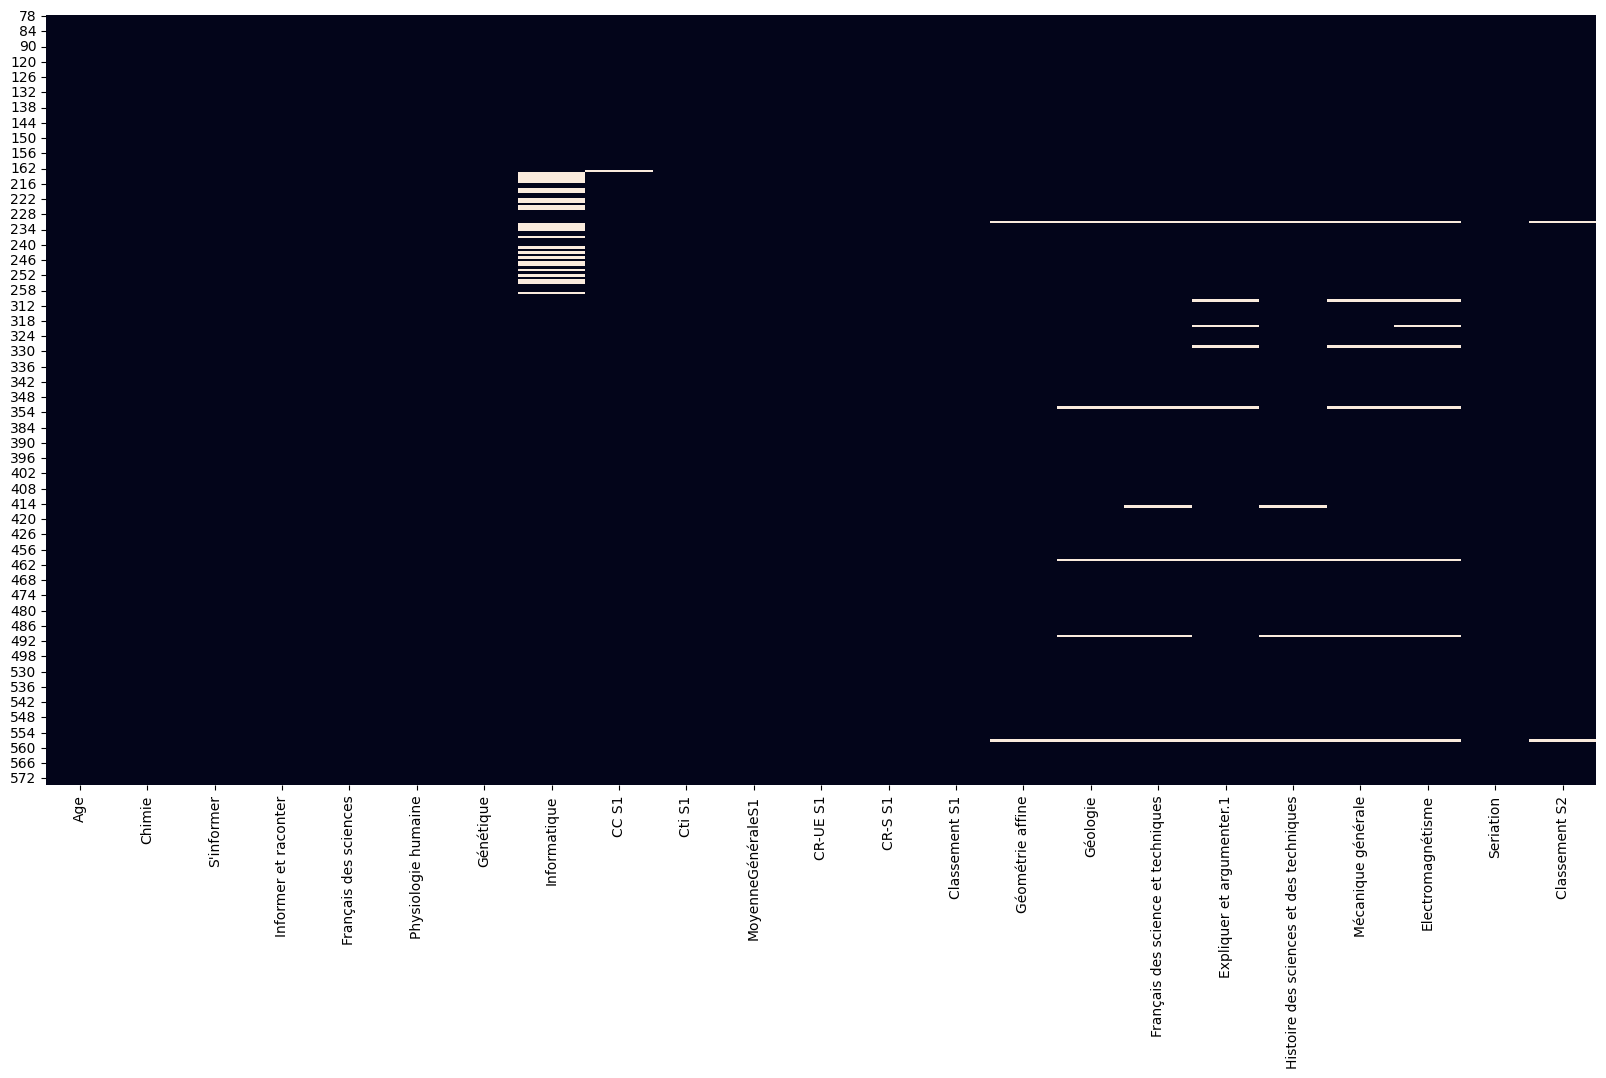

In [133]:
#Suppression des blocs de lignes vides 
colonnes_specifiques = ["Expliquer et argumenter.1", "Mécanique générale", "Electromagnétisme"]

# Recherchez le nombre de lignes vides au début
nombre_lignes_vides = donnees_mention_S_numerical[colonnes_specifiques].isna().all(axis=1).sum()

# Supprimez les lignes correspondantes du DataFrame
donnees_mention_S_numerical = donnees_mention_S_numerical.iloc[nombre_lignes_vides:]

plt.figure(figsize=(20, 10))
sns.heatmap(
donnees_mention_S_numerical.isna(),
cbar=False
)

<Axes: >

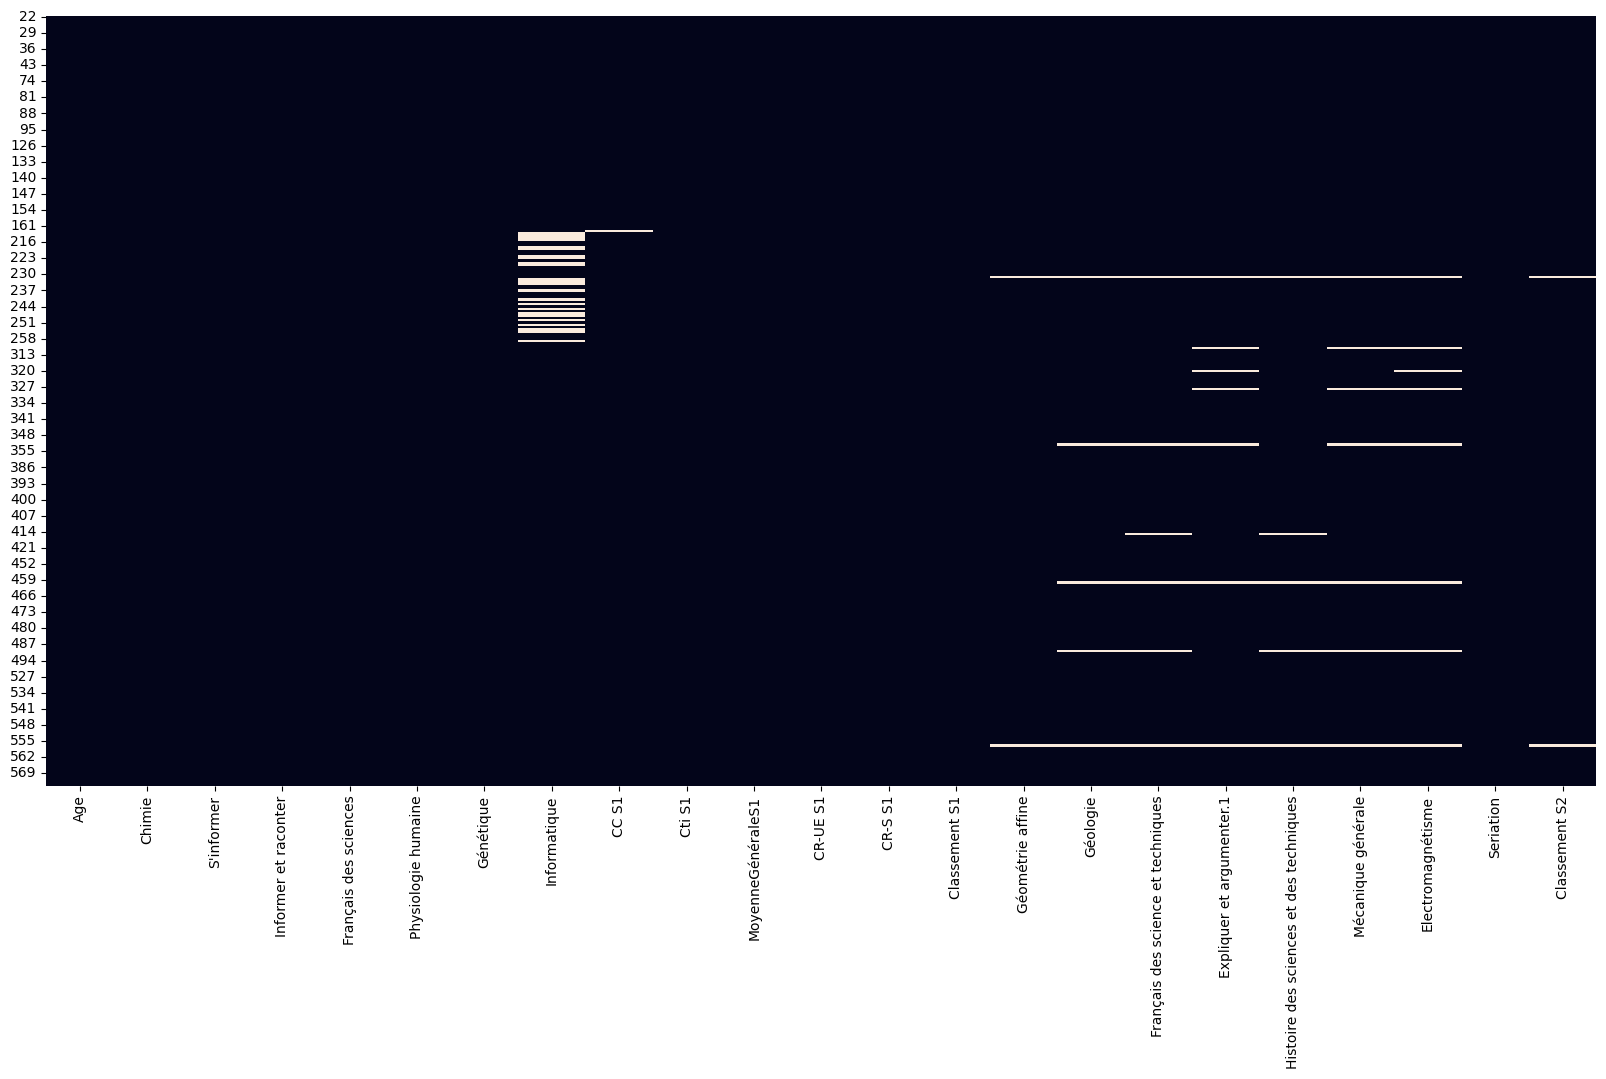

In [134]:
#Concatenation du nouveau DataFrame avec le principale (donnees_mention_S_numerical) sans les blocs vides
#=> Remplacement des blocs vides par des -1

donnees_mention_S_numerical = pd.concat([nouveau_dataframe, donnees_mention_S_numerical],axis=0) 

plt.figure(figsize=(20, 10))
sns.heatmap(
donnees_mention_S_numerical.isna(),
cbar=False
)

<Axes: >

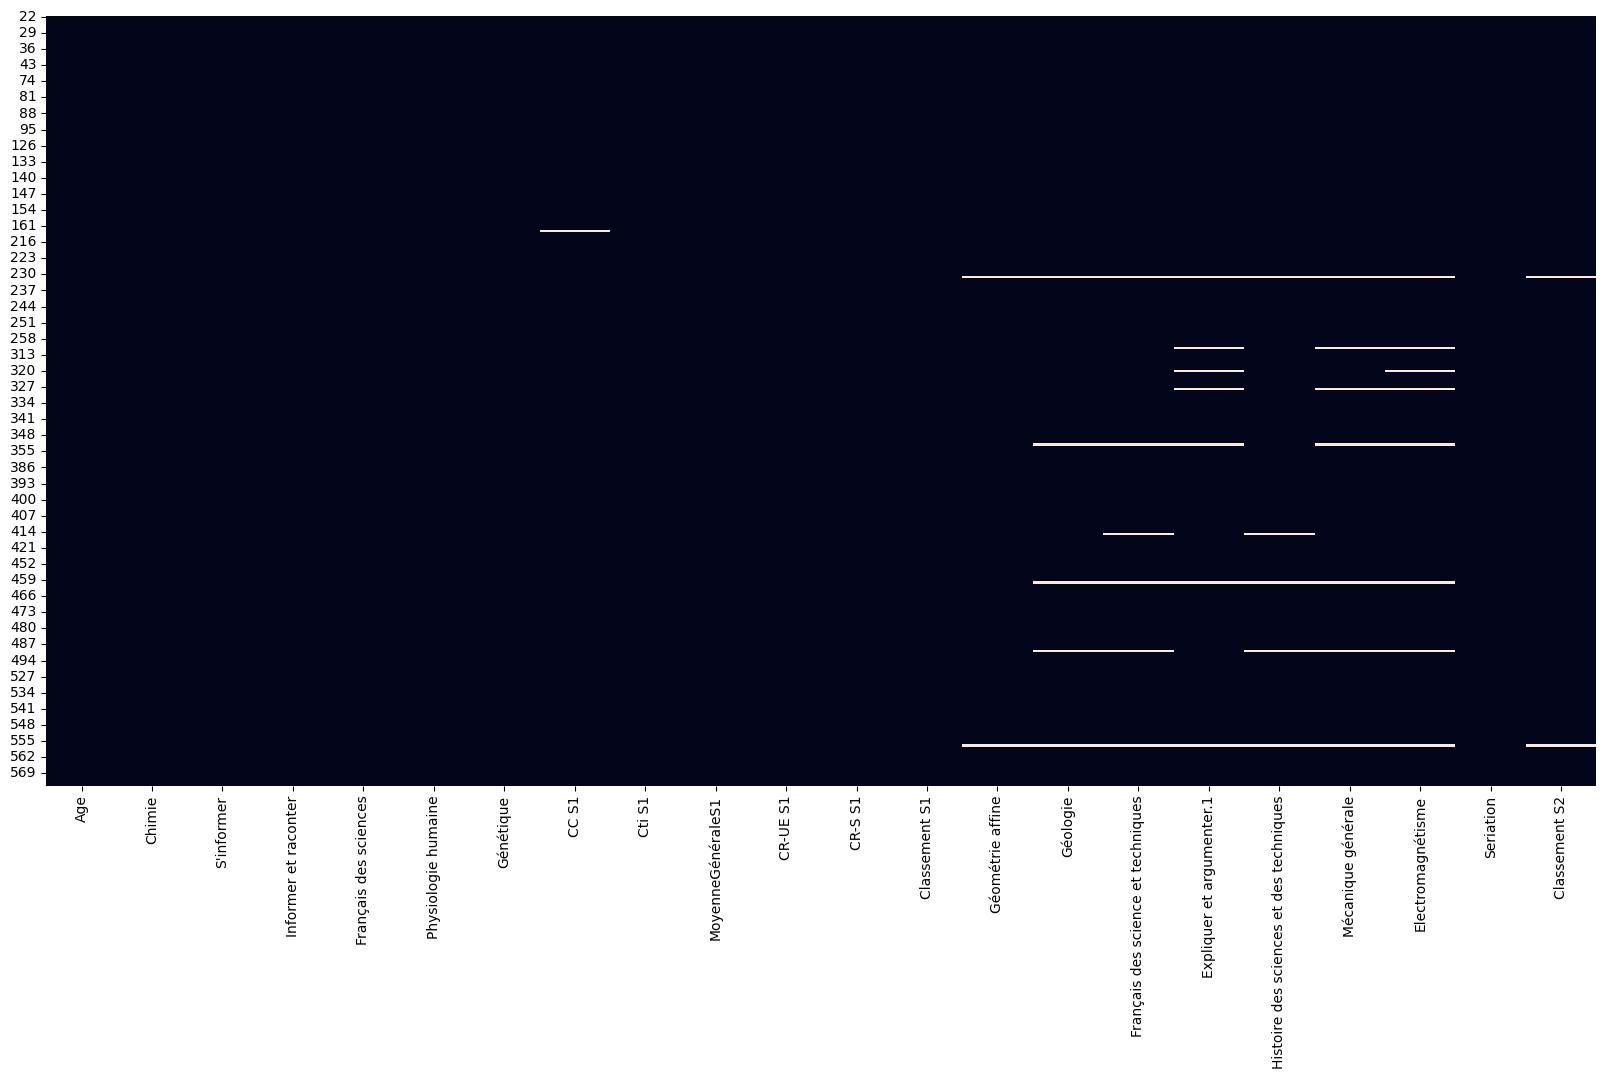

In [135]:
#Suppression colonne Informatique
plt.figure(figsize=(20, 10))
colonnes_a_supprimer_S_numerical = ['Informatique'] 
donnees_mention_S_numerical = donnees_mention_S_numerical.drop(colonnes_a_supprimer_S_numerical, axis = 1)
sns.heatmap(
donnees_mention_S_numerical.isna(),
cbar=False
)

<Axes: >

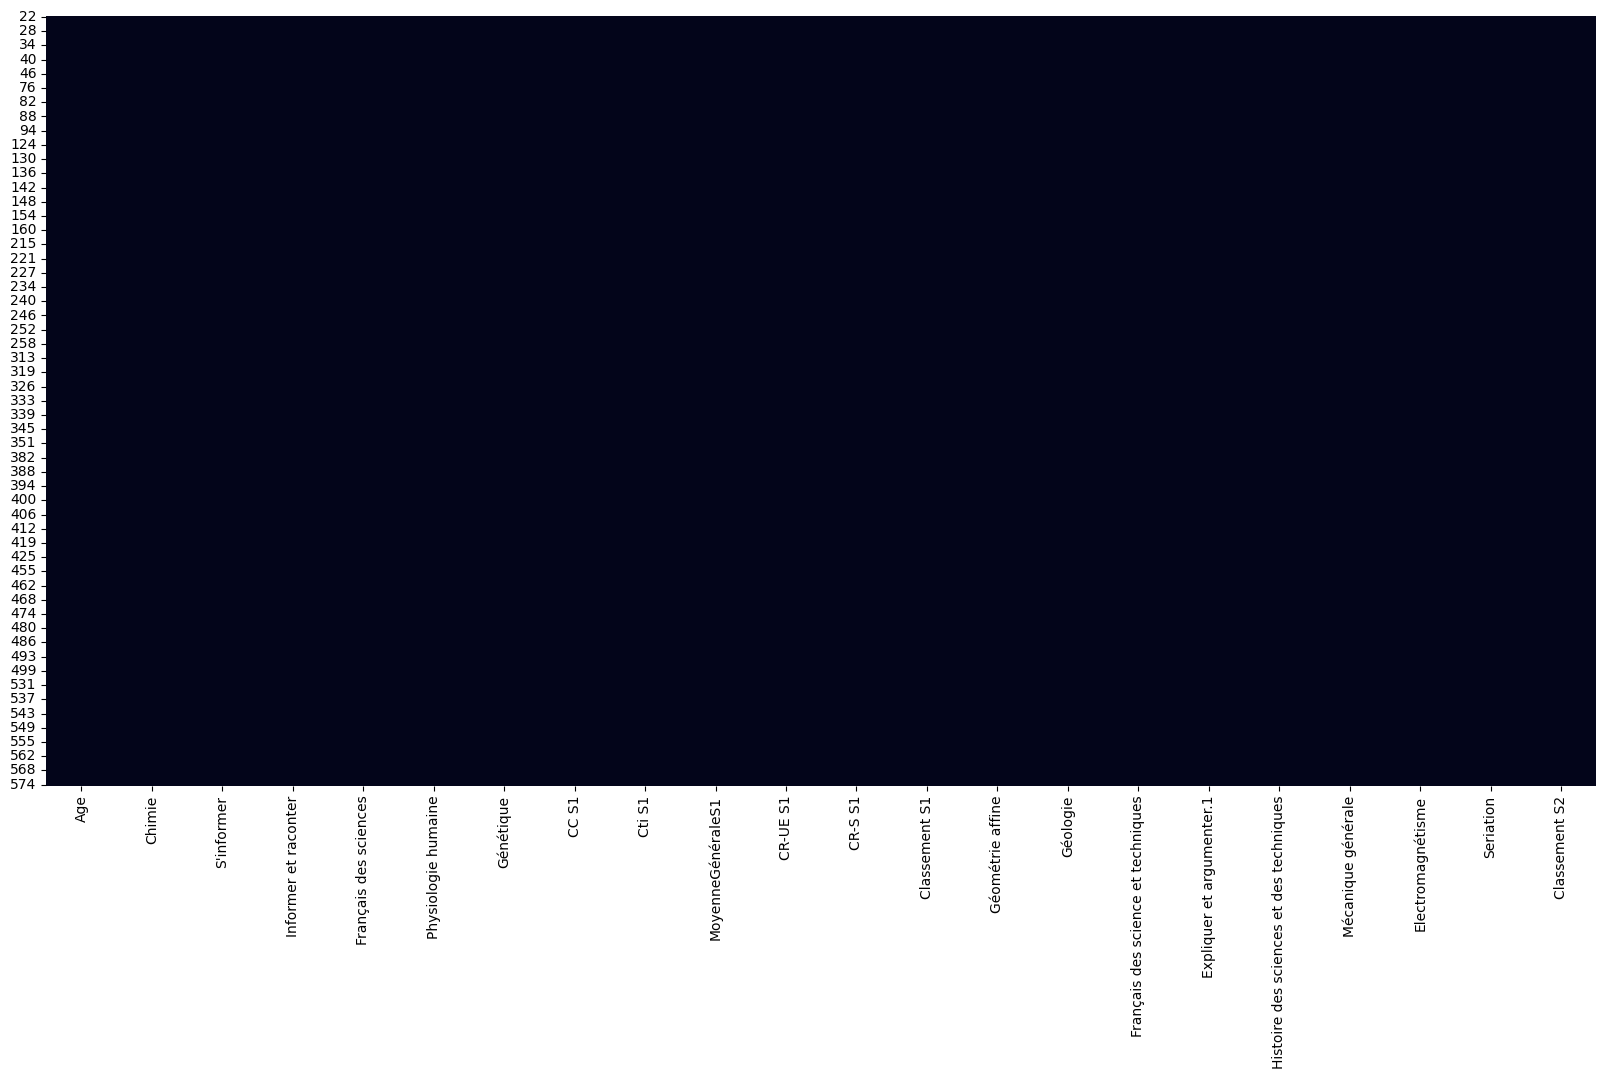

In [136]:
#Suppression des dernières lignes avec des valeurs manquantes
plt.figure(figsize=(20, 10))
donnees_mention_S_numerical = donnees_mention_S_numerical.dropna(axis = 0)
sns.heatmap(
donnees_mention_S_numerical.dropna(axis = 0).isna(),
cbar=False
)

# Visualisation Données object
# Nettoyage

<Axes: >

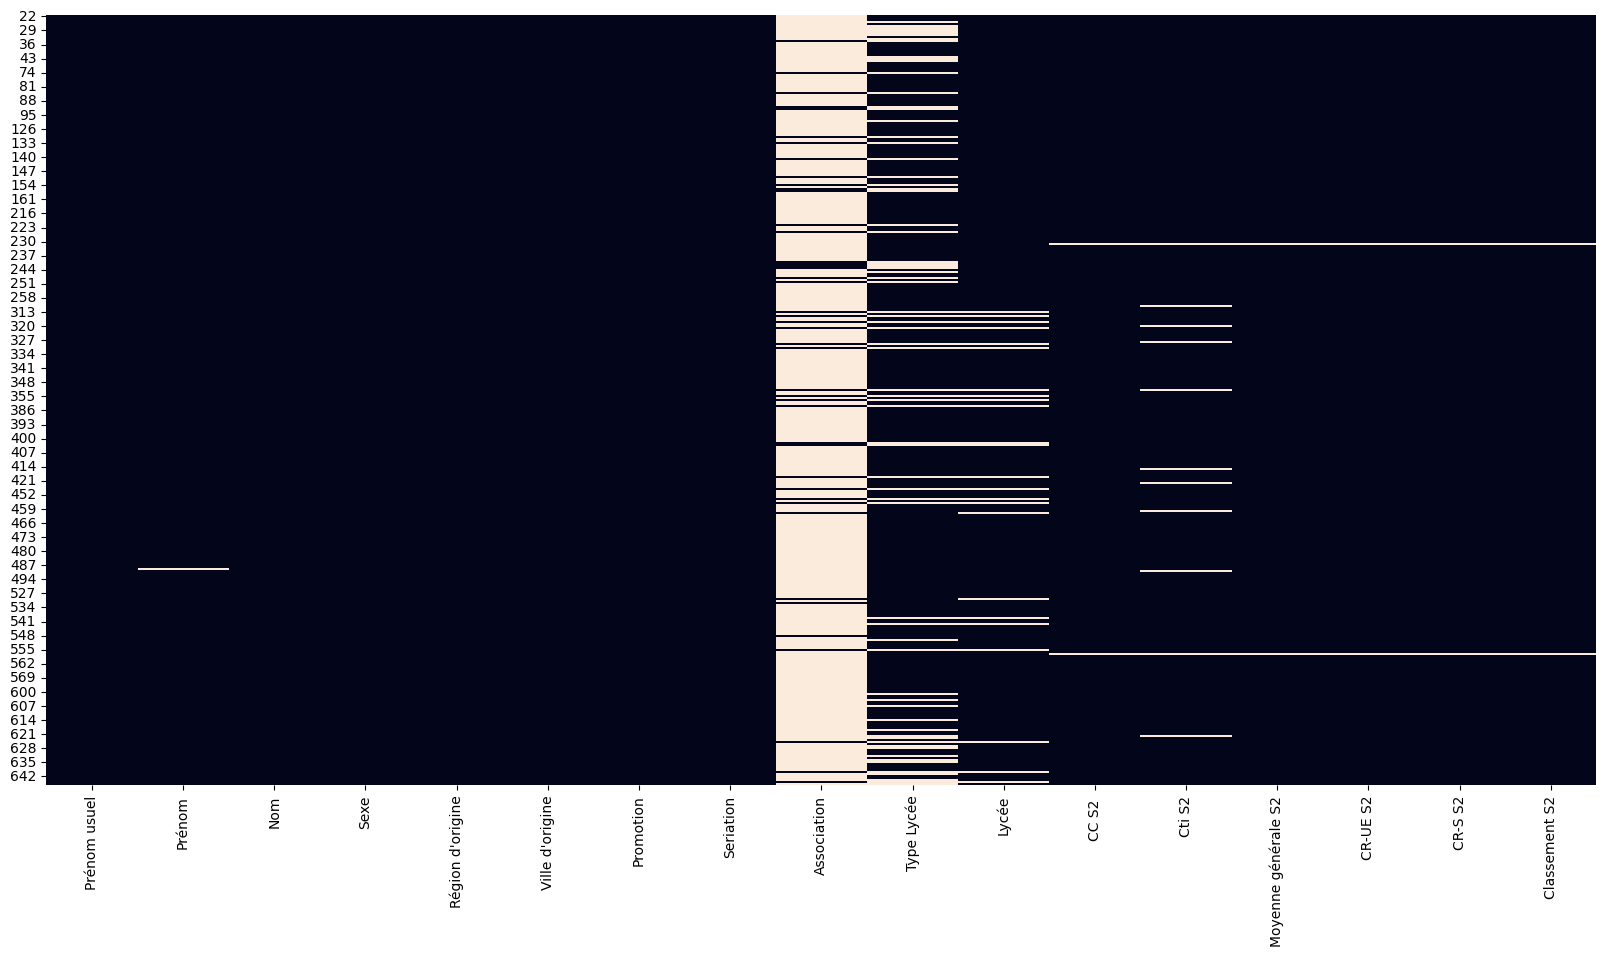

In [137]:
# Les valeurs objet seulement
donnees_mention_S_object = donnees_mention_S.select_dtypes(include=[object]).copy()

plt.figure(figsize=(20, 10))
sns.heatmap(
    donnees_mention_S_object.isna(),
    cbar=False,
)


In [138]:
donnees_mention_S_object.head()

,Prénom usuel,Prénom,Nom,Sexe,Région d'origine,Ville d'origine,Promotion,Seriation,Association,Type Lycée,Lycée,CC S2,Cti S2,Moyenne générale S2,CR-UE S2,CR-S S2,Classement S2
22,Andréa,Hélène Andréa,ZAFISOALINE,F,Analamanga,Antananarivo,P15,S,NaN,Lycée Privé Catholique,Morondava Immaculée Conception,2.770833,3.973958,5.979167,11,11,1
23,Berthin,Bevahiny Berthin,RAFAMANTANANTSOA,G,Vakinankaratra,Fianarantsoa,P15,S,NaN,Lycée Public,Fianar Saint François-Xavier,2.927083,3.032292,4.7225,11,11,9
24,Berthine,Berthine,RAZAFIARISOA,F,Menabe,Miandrivazo,P15,S,NaN,Lycée Privé Catholique,Miandrivazo St Pierre,2.497917,3.272917,5.698333,11,11,3
25,Claudia,Claudia,NDALAMALALA,F,Atsimo Andrefana,Tuléar,P15,S,NaN,NaN,Tuléar P Barré,2.869583,3.029167,4.691375,11,11,10
26,Désiré,Désiré Alfred,RANDRIANARIVELO,G,Boeny,Mahajanga,P15,S,NaN,Lycée Privé Catholique,Mahajunga Notre Dame,3.425,4.002083,5.764375,13,13,2


<Axes: >

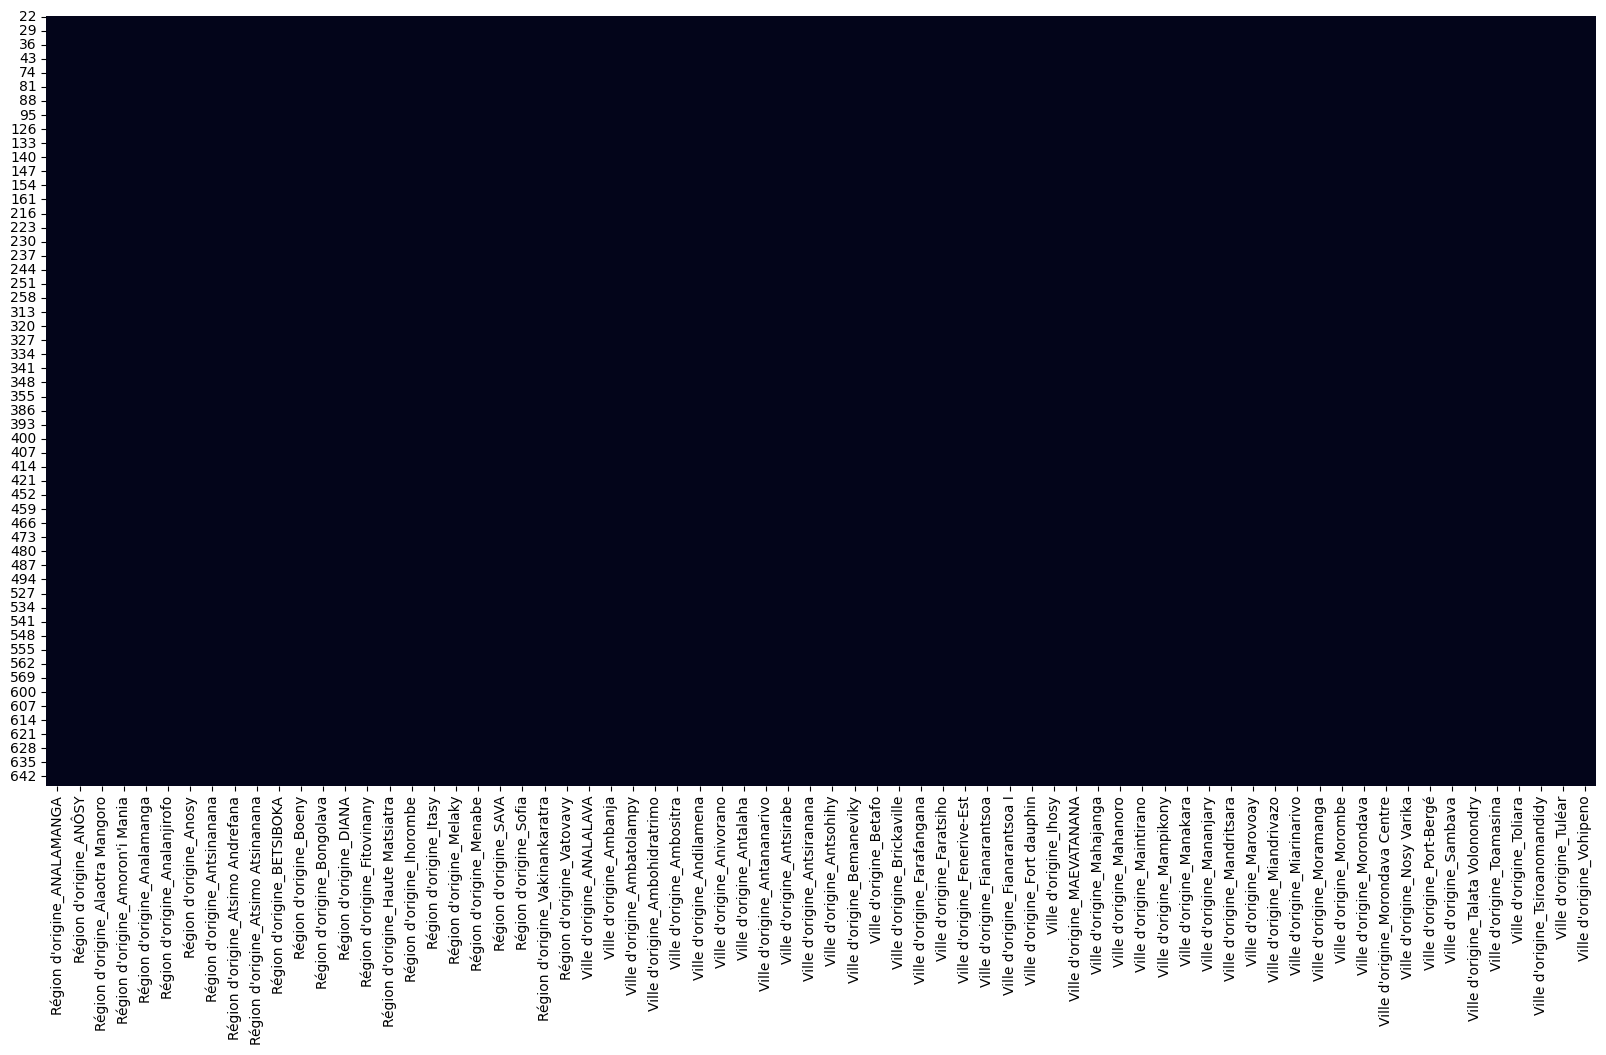

In [139]:
plt.figure(figsize=(20, 10))
colonne_garder_S_object = ["Région d'origine", "Ville d'origine"]
donnees_mention_S_object = donnees_mention_S_object[colonne_garder_S_object]
donnees_mention_S_object = pd.get_dummies(donnees_mention_S_object)
sns.heatmap(
donnees_mention_S_object.isna(),
cbar = False
)

In [140]:
donnees_mention_S_object.head()

,Région d'origine_ANALAMANGA,Région d'origine_ANÔSY,Région d'origine_Alaotra Mangoro,Région d'origine_Amoron'i Mania,Région d'origine_Analamanga,Région d'origine_Analanjirofo,Région d'origine_Anosy,Région d'origine_Antsinanana,Région d'origine_Atsimo Andrefana,Région d'origine_Atsimo Atsinanana,...,Ville d'origine_Morondava Centre,Ville d'origine_Nosy Varika,Ville d'origine_Port-Bergé,Ville d'origine_Sambava,Ville d'origine_Talata Volonondry,Ville d'origine_Toamasina,Ville d'origine_Toliara,Ville d'origine_Tsiroanomandidy,Ville d'origine_Tuléar,Ville d'origine_Vohipeno
22,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Concatenation pour les données S

<Axes: >

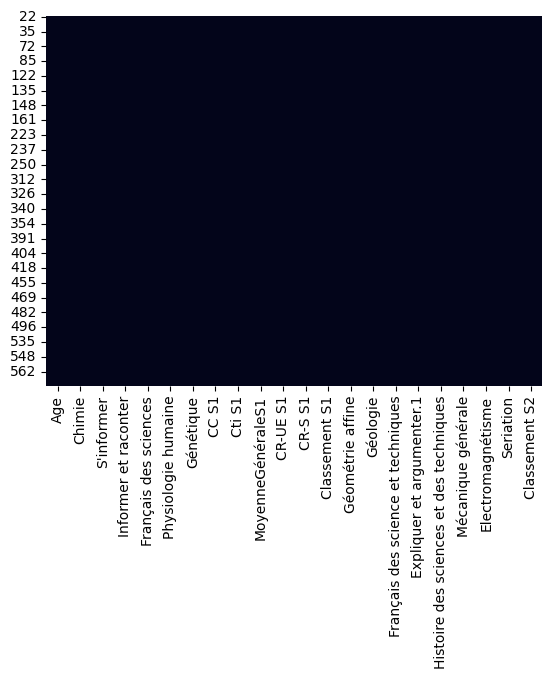

In [141]:
sns.heatmap(
donnees_mention_S_numerical.isna(),
cbar = False
)

In [142]:
donnees_concatenees_S = pd.concat([donnees_mention_S_numerical, donnees_mention_S_object], axis=1)

<Axes: >

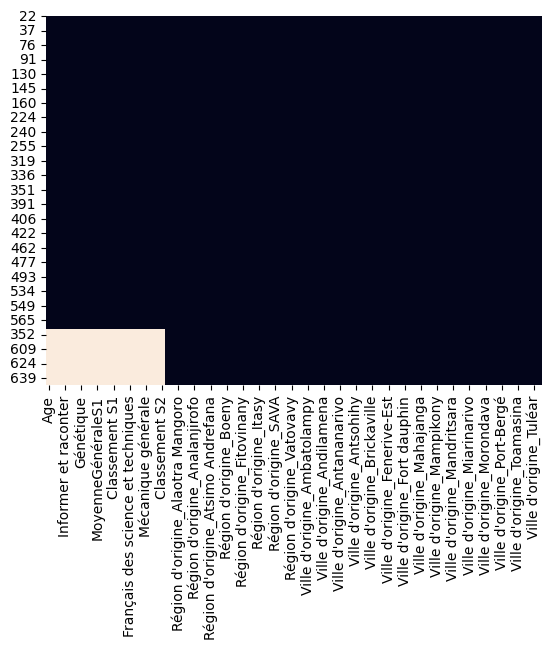

In [145]:
donnees_concatenees_S.head()
sns.heatmap(
donnees_concatenees_S.isna(),
cbar = False
)

In [148]:
donnees_concatenees_S.shape

(383, 92)

In [146]:
print(donnees_concatenees_S['Seriation'])

22       S
23       S
24       S
25       S
26       S
      ... 
642    NaN
643    NaN
644    NaN
645    NaN
646    NaN
Name: Seriation, Length: 383, dtype: object


In [147]:
#encodage du S dans la colonne seriation par 1
donnees_concatenees_S['Seriation']=donnees_concatenees_S['Seriation'].replace({'S':1, 'autre_valeur':0})
print(donnees_concatenees_S['Seriation'])


22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
      ... 
642    NaN
643    NaN
644    NaN
645    NaN
646    NaN
Name: Seriation, Length: 383, dtype: float64


(383, 92)
[[0.68918919 0.56076088]
 [1.         0.49342575]
 [0.74324324 0.42653654]
 [0.66216216 0.42653654]
 [0.43243243 0.51260065]]


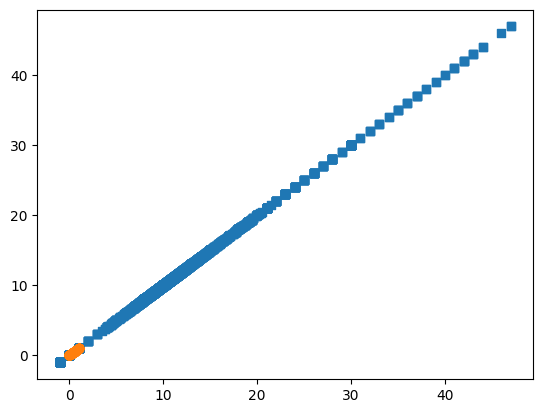

In [149]:
#normalisation
scaler= MinMaxScaler()
donnees_normalisees_S = scaler.fit_transform(donnees_concatenees_S)
print(donnees_normalisees_S.shape)
print(donnees_normalisees_S[:5,:2])
plt.scatter(donnees_concatenees_S[:110],donnees_concatenees_S [:110], marker='s')
plt.scatter(donnees_normalisees_S[:5],donnees_normalisees_S[:5])


# Clustering


In [150]:
# Création de instance de l'algorithme de clustering
nombre_clusters = 2

clusterer = AgglomerativeClustering(n_clusters=nombre_clusters) 

# Application de l'algorithme de clustering aux caractéristiques
clusters = clusterer.fit_predict(donnees_normalisees_S)


df['Cluster'] = clusters

ValueError: Input X contains NaN.
AgglomerativeClustering does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Création de TrainSet et TestSet

In [48]:
#Pour les données de la mention S
X_train_S, X_test_S = train_test_split(donnees_mention_S, test_size=0.2, random_state=42)

print('Train_set_S:', X_train_S.shape)
print('Test_set_S:', X_test_S.shape)

Train_set_S: (306, 46)
Test_set_S: (77, 46)


In [49]:
#Pour les données de la mention L
X_train_L, X_test_L = train_test_split(donnees_mention_L, test_size=0.2, random_state=42)

print('Train_set_L:', X_train_L.shape)
print('Test_set_L:', X_test_L.shape)

Train_set_L: (211, 53)
Test_set_L: (53, 53)


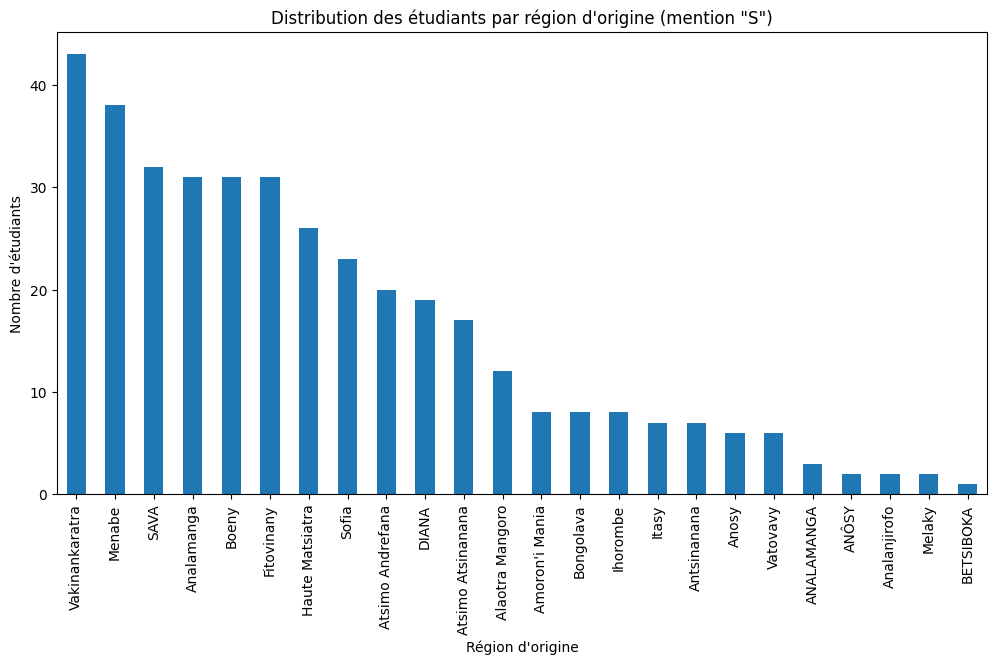

In [53]:
# Analyse de la région d'origine :

# Histogramme pour la région d'origine
plt.figure(figsize=(12, 6))
donnees_mention_S['Région d\'origine'].value_counts().plot(kind='bar')
plt.xlabel('Région d\'origine')
plt.ylabel('Nombre d\'étudiants')
plt.title('Distribution des étudiants par région d\'origine (mention "S")')
plt.show()

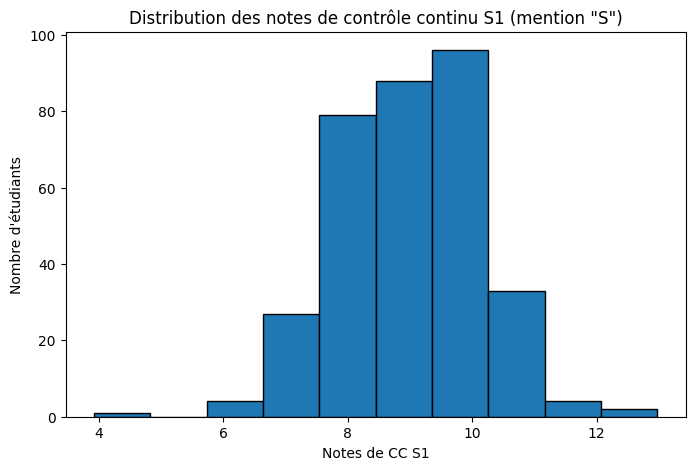

In [54]:
# Notes de contrôle continu (CC S1) :
# Histogramme des notes de contrôle continu (S1)
plt.figure(figsize=(8, 5))
plt.hist(donnees_mention_S['CC S1'], bins=10, edgecolor='black')
plt.xlabel('Notes de CC S1')
plt.ylabel('Nombre d\'étudiants')
plt.title('Distribution des notes de contrôle continu S1 (mention "S")')
plt.show()

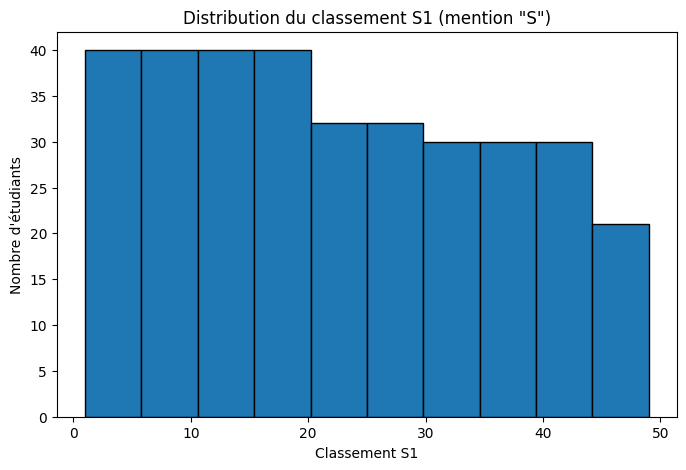

In [55]:
#Classement (Classement S1) :

# Histogramme du classement (S1)
plt.figure(figsize=(8, 5))
plt.hist(donnees_mention_S['Classement S1'], bins=10, edgecolor='black')
plt.xlabel('Classement S1')
plt.ylabel('Nombre d\'étudiants')
plt.title('Distribution du classement S1 (mention "S")')
plt.show()

c:\Users\FX506LH\anaconda3\envs\ProjetM2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FX506LH\anaconda3\envs\ProjetM2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


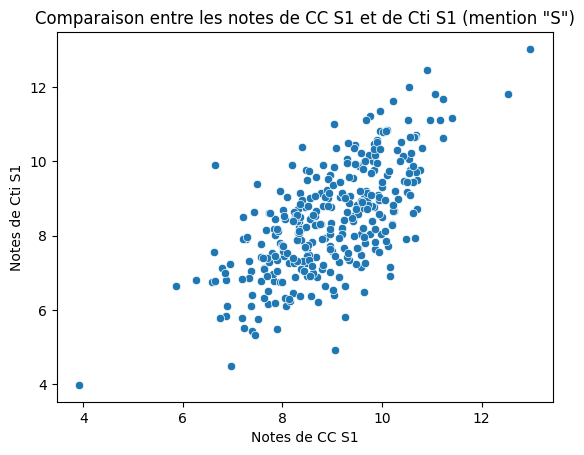

In [56]:
#Comparaison entre les caractéristiques :

# Comparaison entre les notes de CC S1 et de Cti S1
sns.scatterplot(data=donnees_mention_S, x='CC S1', y='Cti S1')
plt.xlabel('Notes de CC S1')
plt.ylabel('Notes de Cti S1')
plt.title('Comparaison entre les notes de CC S1 et de Cti S1 (mention "S")')
plt.show()

In [57]:
#Identification des groupes à risque :

seuil_CC = 10  # Seuil pour les notes de CC S1
seuil_Cti = 10  # Seuil pour les notes de Cti S1

# Identifiez les étudiants à risque élevé
etudiants_a_risque = donnees_mention_S[(donnees_mention_S['CC S1'] < seuil_CC) & (donnees_mention_S['Cti S1'] < seuil_Cti)]

# Affichez les étudiants à risque
print("Étudiants à risque élevé :")
print(etudiants_a_risque[['Prénom', 'Nom', 'CC S1', 'Cti S1', 'Classement S1']])

Étudiants à risque élevé :
                            Prénom               Nom     CC S1    Cti S1  \
23               Bevahiny Berthin   RAFAMANTANANTSOA  8.674352  7.414583   
24                        Berthine      RAZAFIARISOA  8.489995  6.902083   
25                         Claudia       NDALAMALALA  9.364667  9.052083   
26                   Désiré Alfred   RANDRIANARIVELO  8.561308  8.454167   
27                Avotra François   RAZAFIMAHATRATRA  9.440796  8.489583   
..                             ...               ...       ...       ...   
568         Tsarafahitra Stanislas     ZAFINIASIVOLA  8.487579  9.498333   
570               Anhaisie Urcilla       RABOARITINA  9.152937  9.449167   
571                Valerya Todisoa            AINTSO  6.642619  9.899167   
572                  Marie Weindi              MIASA  8.217778  8.389167   
573  MARIE LISAH CHRISTIANNE WENDY           ZAHATSY  9.290794  8.630833   

     Classement S1  
23            25.0  
24            26.0

# EDA

1. Quelle est ma question? / hypothese / idea
2. comment vais-je y répondre?
3. je code cela
4. j'analyse mes résultats et je conclus

#Uniquement pour les S

#Je voudrais identifier s’il y a une relation directe entre la région d’origine de l’étudiant et sont classement en 1er semestre, en utilisant des caractéristiques telles que la région d’origine, les notes générales de contrôle continu durant le 1er semestre (CC S1), les notes générales de contrôle terminal (Cti S1), le classement durant le 1er semestre (Classement S1)


In [99]:
caracteristiques = donnees_mention_S[['Région d\'origine', 'CC S1', 'Cti S1', 'Classement S1']]

In [100]:
nombre_clusters = 2  
clusterer = AgglomerativeClustering(n_clusters=nombre_clusters)


# Visualisation


In [47]:

df_numerical = df.select_dtypes(include=[float, int]).copy()
df_numerical["Seriation"] = df["Seriation"].copy()
df_numerical["Classement S2"] = df["Classement S2"].copy()
df_numerical = df_numerical.query("`Classement S2` != '-'")

<Axes: >

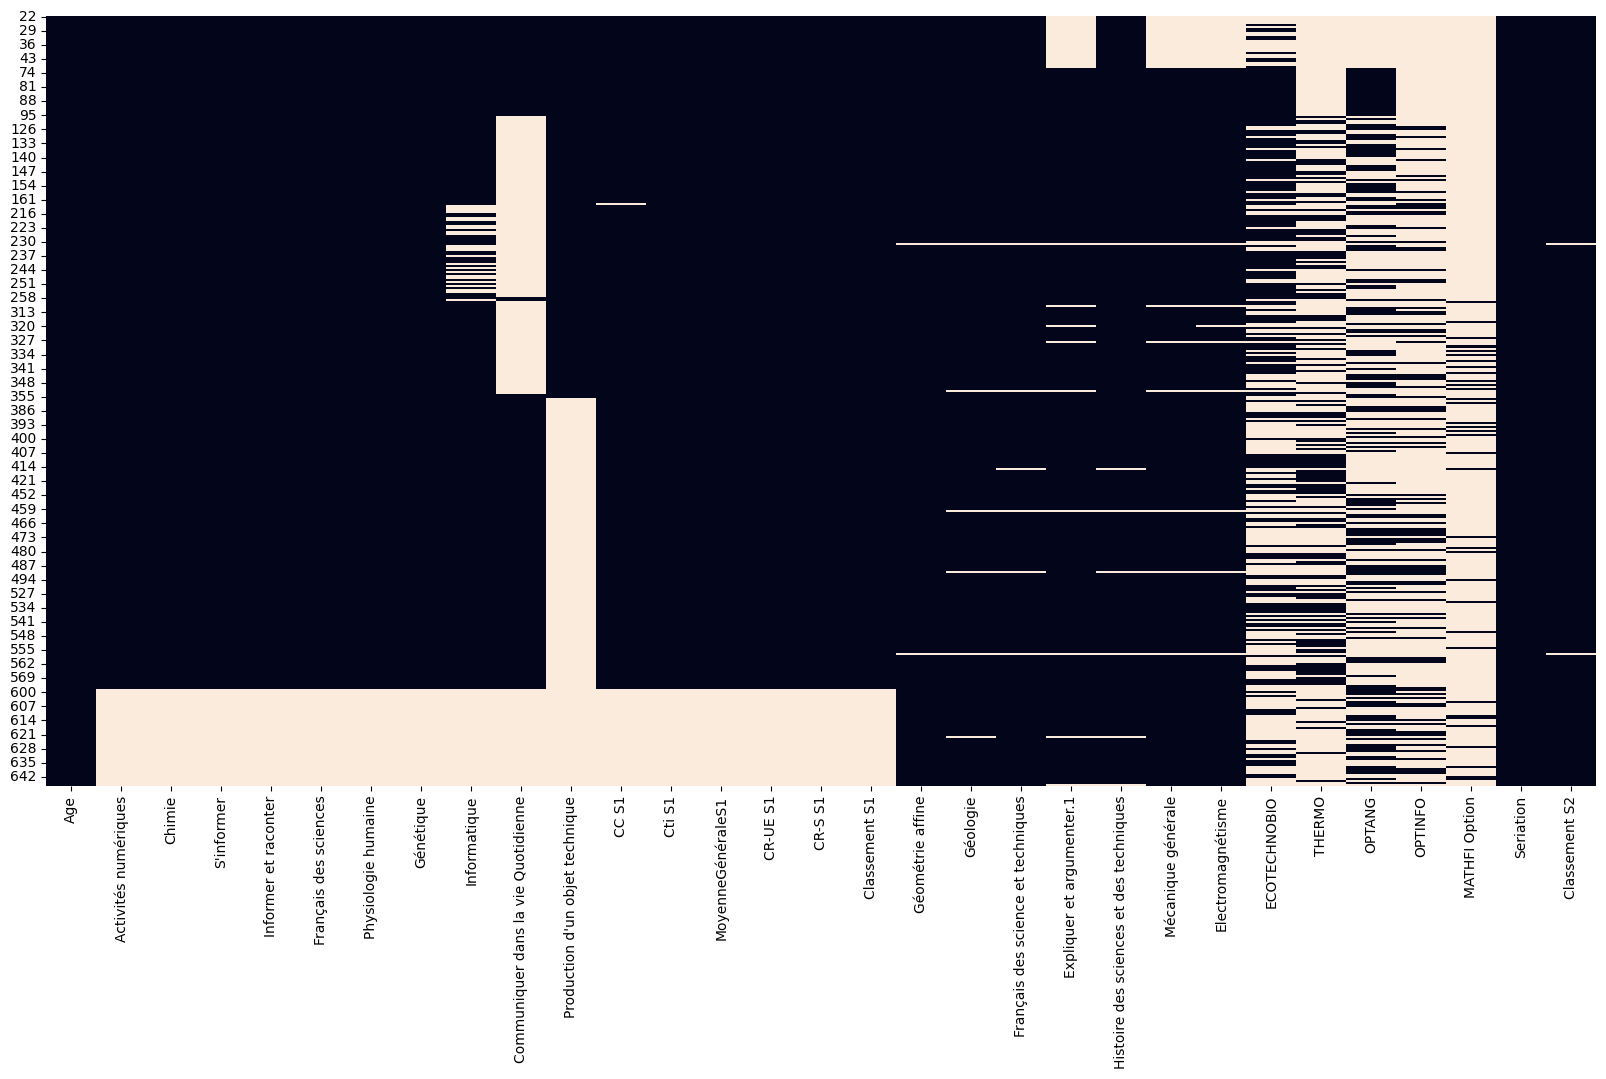

In [53]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    df_numerical.query("`Seriation` == 'S'").dropna(thresh=0.9, axis=1).isna(),
    cbar=False,
)

# Clustering aggloméré

In [88]:
# Sélection des caractéristiques pertinentes
caracteristiques = df[['CC S1', 'Cti S1', 'Classement S1']]

# Ajoutez les colonnes encodées de "Région d'origine" à vos caractéristiques
caracteristiques = pd.concat([caracteristiques, pd.DataFrame(encoder_region, columns=['Région_' + str(i) for i in range(encoder_region.shape[1])])], axis=1)



# Création de instance de l'algorithme de clustering
nombre_clusters = 2

clusterer = AgglomerativeClustering(n_clusters=nombre_clusters) 

# Application de l'algorithme de clustering aux caractéristiques
clusters = clusterer.fit_predict(caracteristiques)

# Ajoutez les étiquettes de cluster à votre DataFrame d'origine (en supposant que votre DataFrame s'appelle "df")
df['Cluster'] = clusters

ValueError: Input X contains NaN.
AgglomerativeClustering does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [22]:
df["Seriation"].value_counts()


Seriation
S    383
L    264
Name: count, dtype: int64

In [26]:
df["Age"].describe()


count    646.000000
mean      18.203915
std        1.291621
min        0.000000
25%       17.600000
50%       18.200000
75%       18.900000
max       21.500000
Name: Age, dtype: float64

In [27]:
df.query("Age == 0")


,Prénom usuel,Prénom,Nom,Sexe,Age,Région d'origine,Ville d'origine,Promotion,Seriation,Association,...,THERMO,OPTANG,OPTINFO,MATHFI Option,CC S2,Cti S2,Moyenne générale S2,CR-UE S2,CR-S S2,Classement S2
13,Nancy,Nancy Claudia,RAZANAJATOVO Harilalaina,F,0.0,Atsimo Andrefana,Tuléar,P15,L,NaN,...,NaN,NaN,NaN,NaN,5.735417,5.013542,6.908958,8,8,20


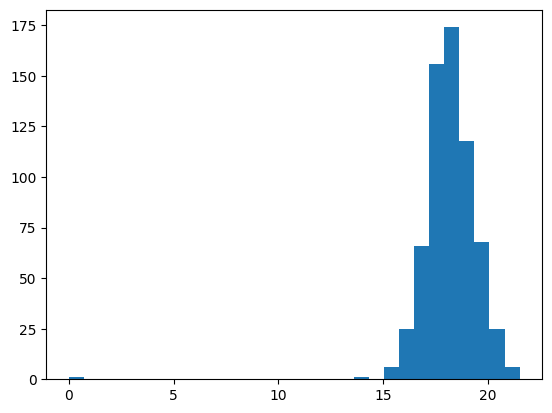

In [28]:
plt.hist(df["Age"], bins=30)
plt.show()


In [29]:
df["Région d'origine"].value_counts()


Région d'origine
Analamanga             62
Menabe                 61
SAVA                   52
Haute Matsiatra        49
Vakinankaratra         40
Boeny                  38
Atsimo Andrefana       35
Vankinakaratra         31
DIANA                  29
Fitovinany             26
SOFIA                  26
Atsinanana             18
Vatovavy Fitovinany    17
Alaotra Mangoro        14
Antsinanana            13
Sofia                  13
Atsimo Atsinanana      12
Amoron'i Mania          9
Anosy                   9
Ihorombe                9
Itasy                   9
Alaotra-Mangoro         8
Vatovavy                8
ANALAMANGA              7
Bongolava               6
Vatovavy                6
MENABE                  6
Atsimo-Andrefana        5
ITASY                   5
BOENY                   5
Analanjirofo            4
Melaky                  3
BONGOLAVA               3
ANÔSY                   2
IHOROMBE                2
Tsiroanomandidy         1
BETSIBOKA               1
Name: count, dtype: i

In [30]:
df["Type Lycée"].value_counts()


Type Lycée
Lycée Catholique          306
Lycée Public               72
Lycée Privé Catholique     57
Lycée Catholique           36
Lycée Privé                26
s                           1
Name: count, dtype: int64

In [31]:
df.query("`Type Lycée` == 's'")["Lycée"]


461    NaN
Name: Lycée, dtype: object

In [32]:
df["Type Lycée"].isna().sum() / len(df)


0.2302936630602782

In [24]:
df["Type Lycée"]


0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
             ...        
642         Lycée Public
643    Lycée Catholique 
644                  NaN
645                  NaN
646                  NaN
Name: Type Lycée, Length: 647, dtype: object

In [34]:
df["Lycée"].isna().sum() / len(df)


0.09119010819165378

## Correlation analysis

1. Quelle est ma question? / hypothese / idea
2. comment vais-je y répondre?
3. je code cela
4. j'analyse mes résultats et je conclus

In [23]:
df.groupby(by="Lycée")["Génétique"].describe()


,count,mean,std,min,25%,50%,75%,max
Lycée,,,,,,,,
Akamasoa,3.0,10.548958,2.066644,8.19375,9.793750,11.393750,11.726562,12.059375
Andralanitra,1.0,10.187500,NaN,10.18750,10.187500,10.187500,10.187500,10.187500
Antananarivo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antsirabe André Resampa,1.0,10.043750,NaN,10.04375,10.043750,10.043750,10.043750,10.043750
Antsirabe St Joseph,5.0,11.510000,1.089481,10.16875,10.593750,11.809375,12.262500,12.715625
...,...,...,...,...,...,...,...,...
Tuléar P Barré,2.0,10.825000,0.053033,10.78750,10.806250,10.825000,10.843750,10.862500
Tuléar Père Barré,4.0,10.546875,1.233184,8.92500,9.951562,10.771875,11.367188,11.718750
Tuléar SC Mahavatse,2.0,10.028125,0.304940,9.81250,9.920312,10.028125,10.135938,10.243750


In [36]:
df.columns


Index(['Prénom usuel', 'Prénom', 'Nom', 'Sexe', 'Age', 'Région d'origine',
       'Ville d'origine', 'Promotion', 'Seriation', 'Association',
       'Type Lycée', 'Lycée', 'Activités numériques', 'Chimie', 'S'informer',
       'Informer et raconter', 'Français des sciences', 'Physiologie humaine',
       'Génétique', 'Informatique', 'Communiquer dans la vie Quotidienne',
       'Production d'un objet technique',
       'Français, Langue de l'enseignement supérieur',
       'Informer et raconter.1', 'Comprendre le monde contemporain ',
       'S'informer.1', ' Activités numériques', 'Informatique.1', 'Options 1',
       'Habiter Antananarivo', 'CC S1', 'Cti S1', 'MoyenneGénéraleS1',
       'CR-UE S1', 'CR-S S1', 'Classement S1', 'Expliquer et argumenter',
       'Comprendre "l'énigme malgache"', 'Génération', 'Esprit de synthèse',
       'Statistiques', 'Philo-Politique', 'Littérature francophone',
       'Optionnel anglais', 'Eco-gé', 'Malagasy', 'Mathématique financière',
       'Géom

In [41]:
df[["CC.S2", "Cti.S2", "MoyenneGénérale.S2", "CR-UE.S2", "CR-S.S2", "Classement.S2"]].dtypes


KeyError: "None of [Index(['CC.S2', 'Cti.S2', 'MoyenneGénérale.S2', 'CR-UE.S2', 'CR-S.S2',\n       'Classement.S2'],\n      dtype='object')] are in the [columns]"

In [ ]:
df["Classement S2"].value_counts()


Classement S2
5     18
18    18
17    18
1     18
15    18
16    18
2     18
3     18
20    18
4     18
6     18
11    18
14    18
8     18
10    18
9     18
12    18
13    18
7     18
19    18
21    17
22    17
23    16
24    13
25    10
26    10
36     9
40     9
41     9
31     9
27     9
33     9
39     9
37     9
38     9
44     9
42     9
30     9
43     9
34     9
28     9
29     9
35     9
32     9
45     8
46     7
47     7
48     5
-      1
Name: count, dtype: int64

In [ ]:
df.query("`Classement S2` == 5")


,Prénom usuel,Prénom,Nom,Sexe,Age,Région d'origine,Ville d'origine,Promotion,Seriation,Association,...,THERMO,OPTANG,OPTINFO,MATHFI Option,CC.1,Cti.1,Note,CR-UE.1,CR-S.1,Classement S2
0,Andréa,Marie Andréa,TEFINANAHARY,F,17.800000,Fitovinany,Manakara,P15,L,NaN,...,NaN,NaN,NaN,NaN,7.547917,7.205208,9.240625,21,21,5
32,Manantena,Gabriel,ANDRIAMANANTENA,G,20.400000,Vankinakaratra,Fianarantsoa,P15,S,NaN,...,NaN,NaN,NaN,NaN,3.659167,3.842708,5.257417,8,8,5
61,Jessie,Jessie Stéphanie,RAMANATSIALONINA,F,18.200000,Atsimo Andrefana,Toliary,P16,L,NaN,...,NaN,NaN,NaN,NaN,10.160714,7.261161,13.192738,25,30,5
94,Vanessa,Vanessa,BAKOLINASANDRATRA,F,17.800000,Boeny,Mahajanga,P16,S,NaN,...,NaN,14.50,NaN,NaN,11.001202,10.348798,13.255112,26,30,5
99,Christelle,Christelle,KAMANDA,F,18.000000,Menabe,Morondava,P17,L,NaN,...,NaN,NaN,NaN,NaN,10.949777,9.949936,12.319515,27,30,5
144,Marino,Marino Gévéniste,LAHADY,G,16.700000,SAVA,Sambava,P17,S,NaN,...,NaN,13.35,NaN,NaN,10.473558,10.392871,12.754713,26,30,5
188,Malala,Malalatiana,ANDRIANOMENJANAHARY,F,18.100000,Analamanga,Antananarivo,P18,L,Sœur Petite servante Ambohimirary,...,NaN,NaN,NaN,NaN,10.525,10.758333,13.4125,25.5,30,5
238,Laures,Jean Laures,MAHATOKY,G,17.500000,SAVA,Sambava,P18,S,NaN,...,11.300000,NaN,NaN,NaN,9.635577,8.840745,12.644255,17,30,5
260,Alberto,Jean Alberto,RAKOTONDRASOA,G,20.600000,Boeny,Mahajanga,P19,L,NaN,...,NaN,NaN,NaN,NaN,9.706473,8.72154,11.896763,24,30,5
327,Hélinah,Mariah Zitah Hélinah,RAVOLANANDRASANA,F,18.700000,Alaotra Mangoro,Andilamena,P19,S,NaN,...,13.866667,NaN,NaN,NaN,10.712484,10.276442,12.857109,26,30,5


In [ ]:
df_numerical = df.select_dtypes(include=[float, int]).copy()

df_numerical["Seriation"] = df["Seriation"].copy()
df_numerical["Classement S2"] = df["Classement S2"].copy()
df_numerical = df_numerical.query("`Classement S2` != '-'")

df_numerical.head()


,Age,Activités numériques,Chimie,S'informer,Informer et raconter,Français des sciences,Physiologie humaine,Génétique,Informatique,Communiquer dans la vie Quotidienne,...,Histoire des sciences et des techniques,Mécanique générale,Electromagnétisme,ECOTECHNOBIO,THERMO,OPTANG,OPTINFO,MATHFI Option,Seriation,Classement S2
0,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,5
1,16.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,18
2,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,7
3,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,13
4,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,12


In [42]:
import seaborn as sns


<Axes: >

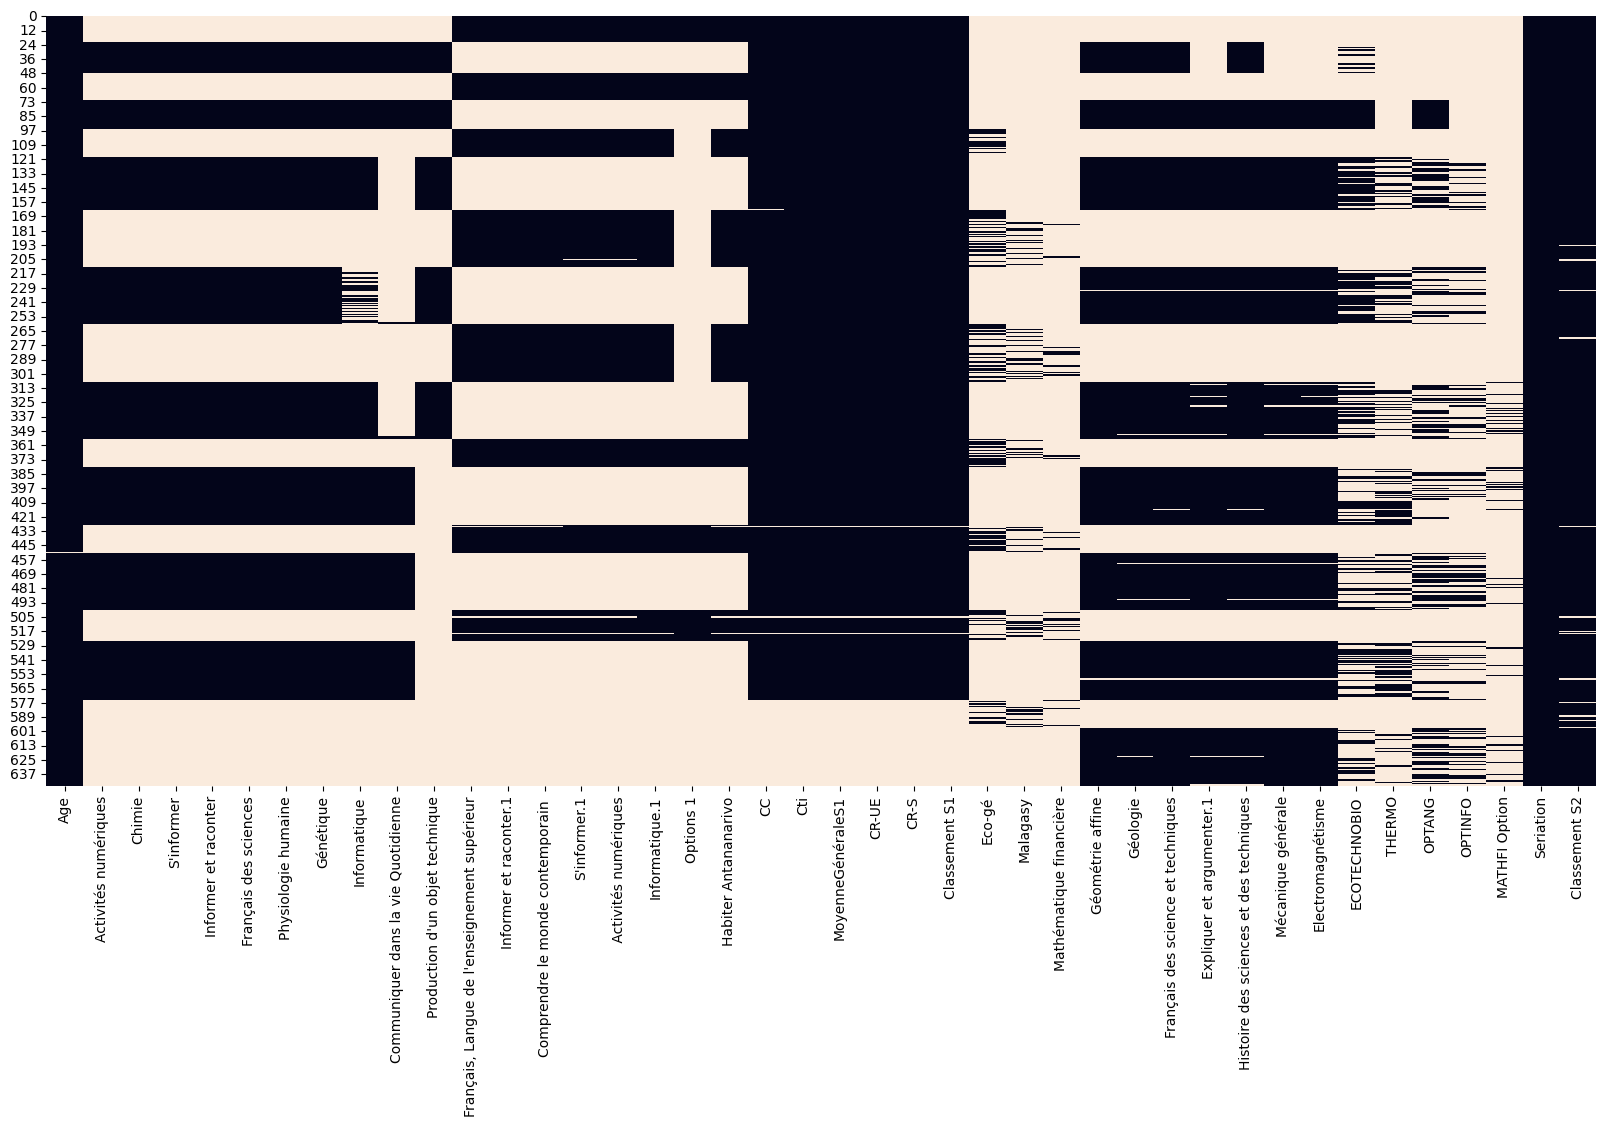

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_numerical.isna(), cbar=False)


<Axes: >

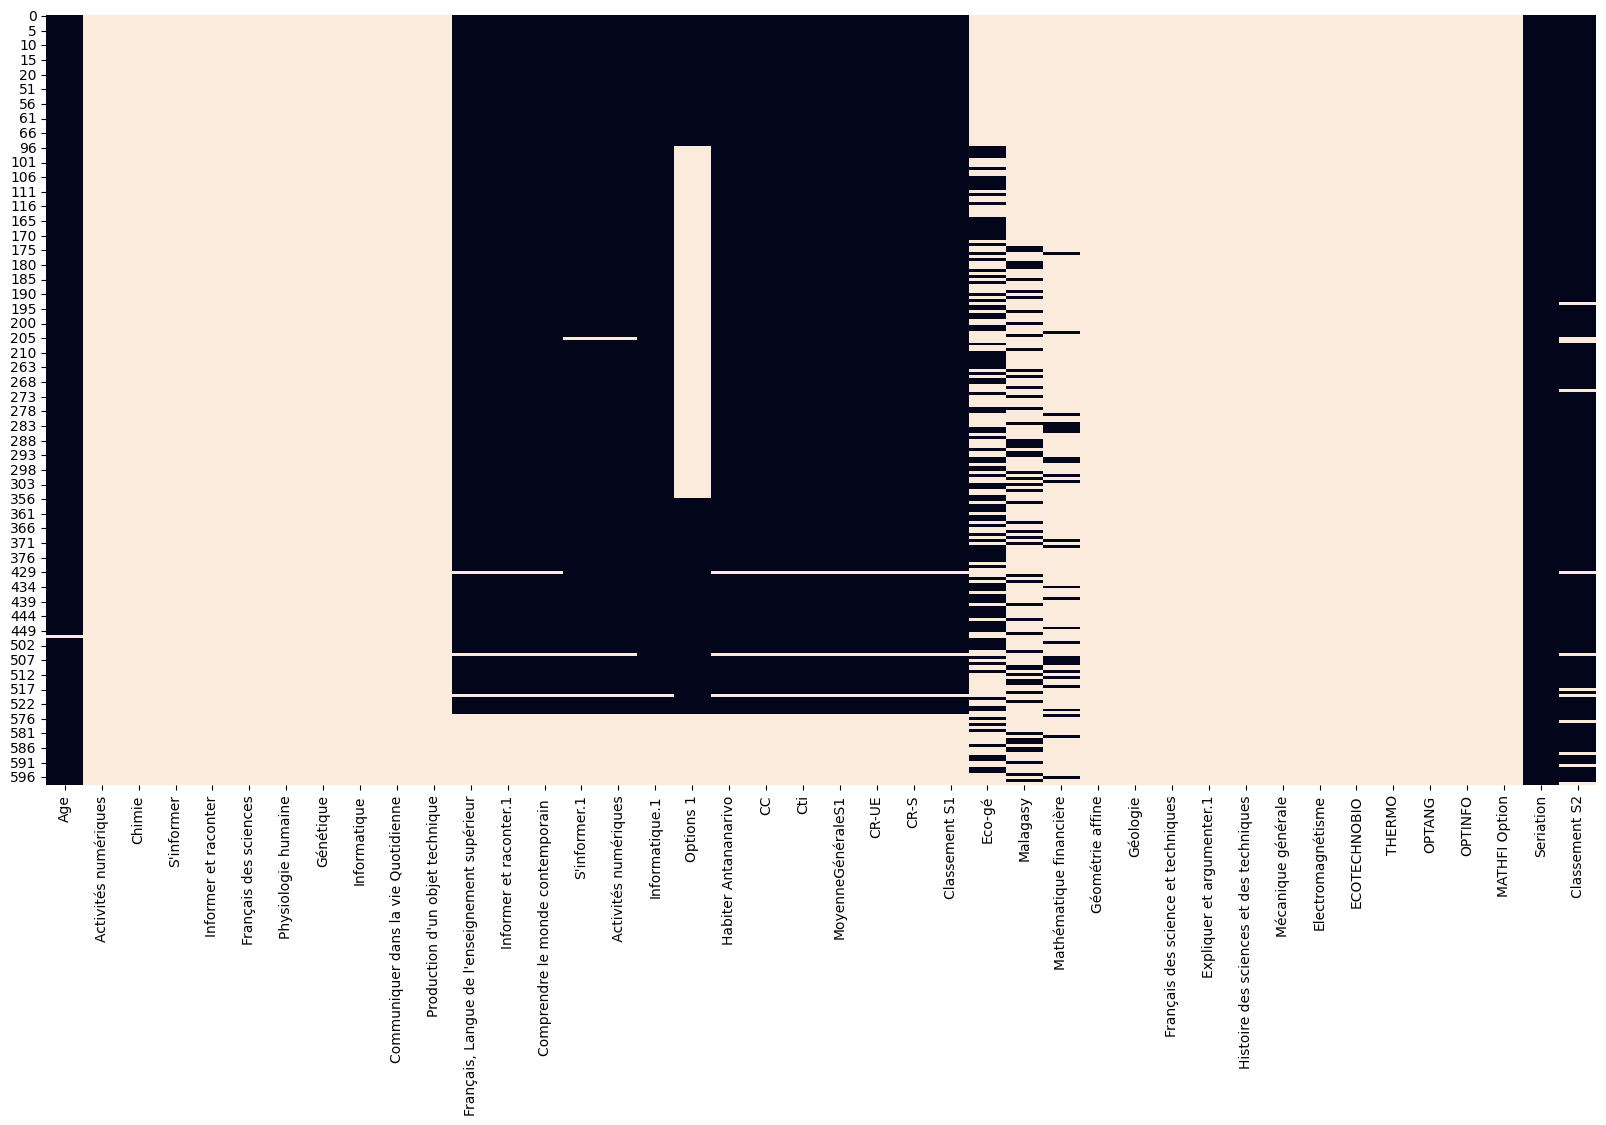

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_numerical.query("`Seriation` == 'L'").isna(), cbar=False)


<Axes: >

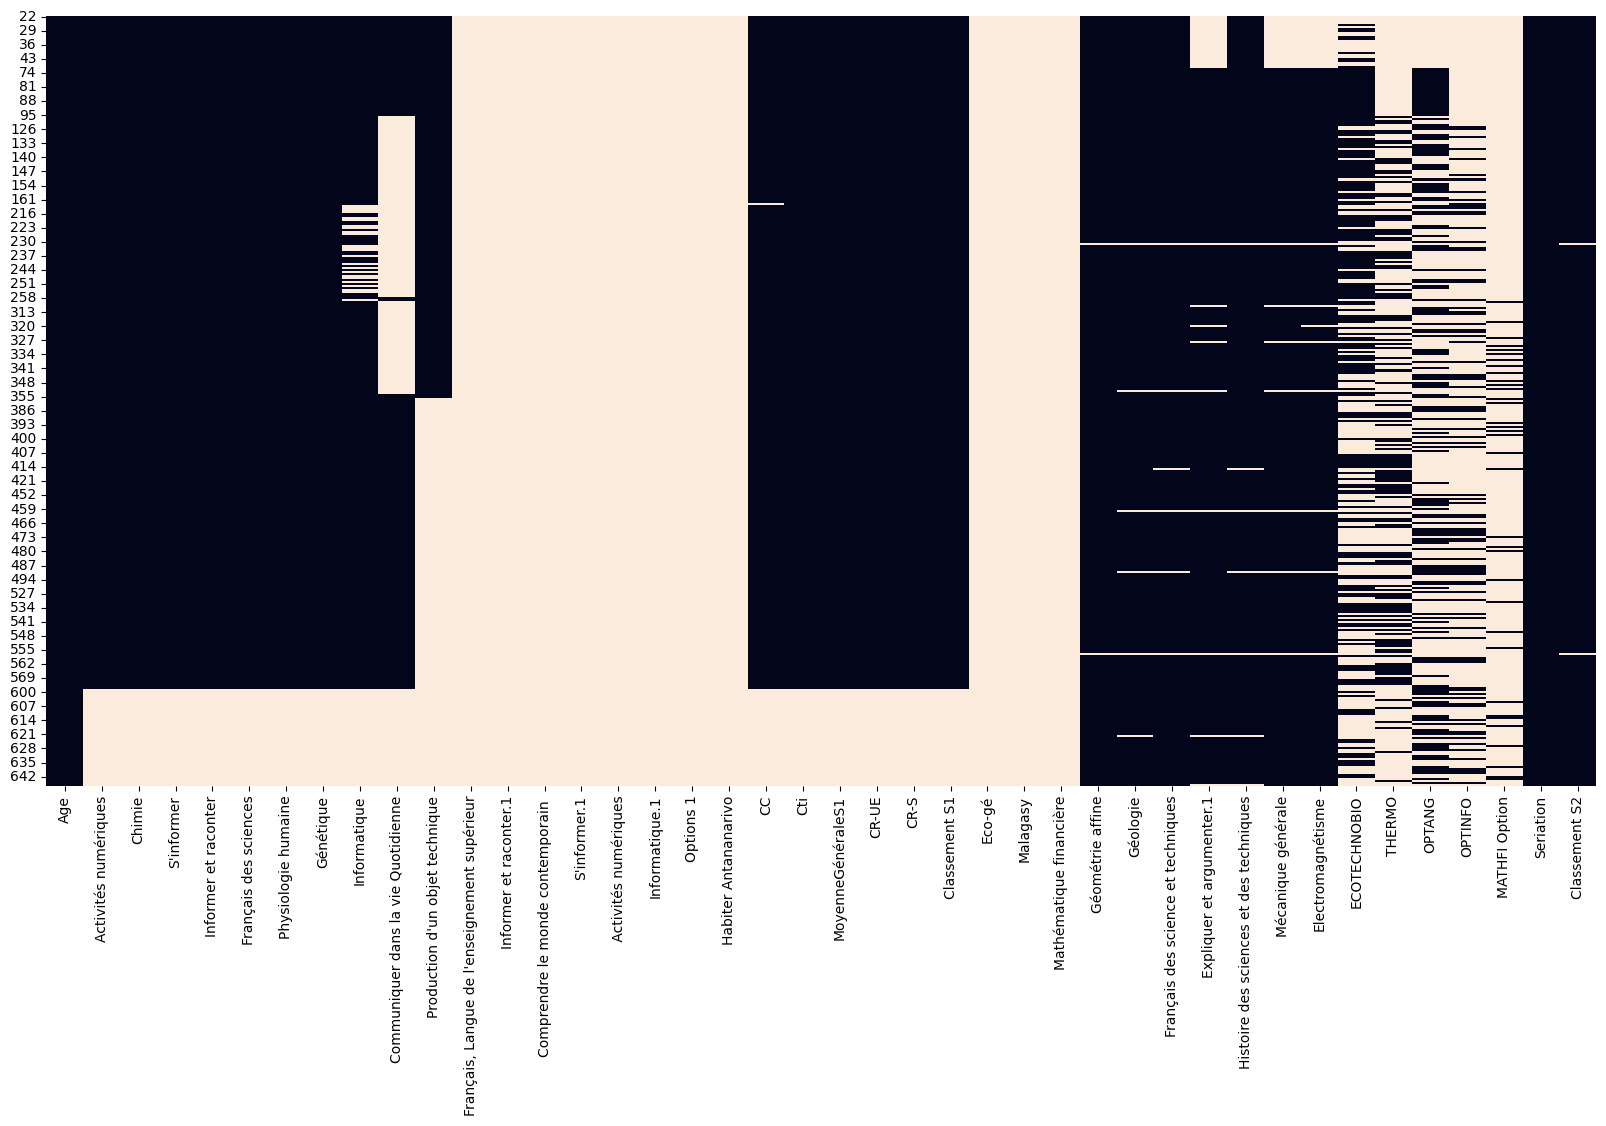

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_numerical.query("`Seriation` == 'S'").isna(), cbar=False)


In [ ]:
df.query("`Seriation` == 'S' & `Classement S2`.isna() == True")


,Prénom usuel,Prénom,Nom,Sexe,Age,Région d'origine,Ville d'origine,Promotion,Seriation,Association,...,THERMO,OPTANG,OPTINFO,MATHFI Option,CC.1,Cti.1,Note,CR-UE.1,CR-S.1,Classement S2
231,Ianel,Ianel,TOMBOZAFY,G,17.8,Boeny,Mahajanga,P18,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,Ony,Norosoa Francine,RAONIVOLOLONARIVO,F,16.7,Amoron'i Mania,AMBOSITRA,P23,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

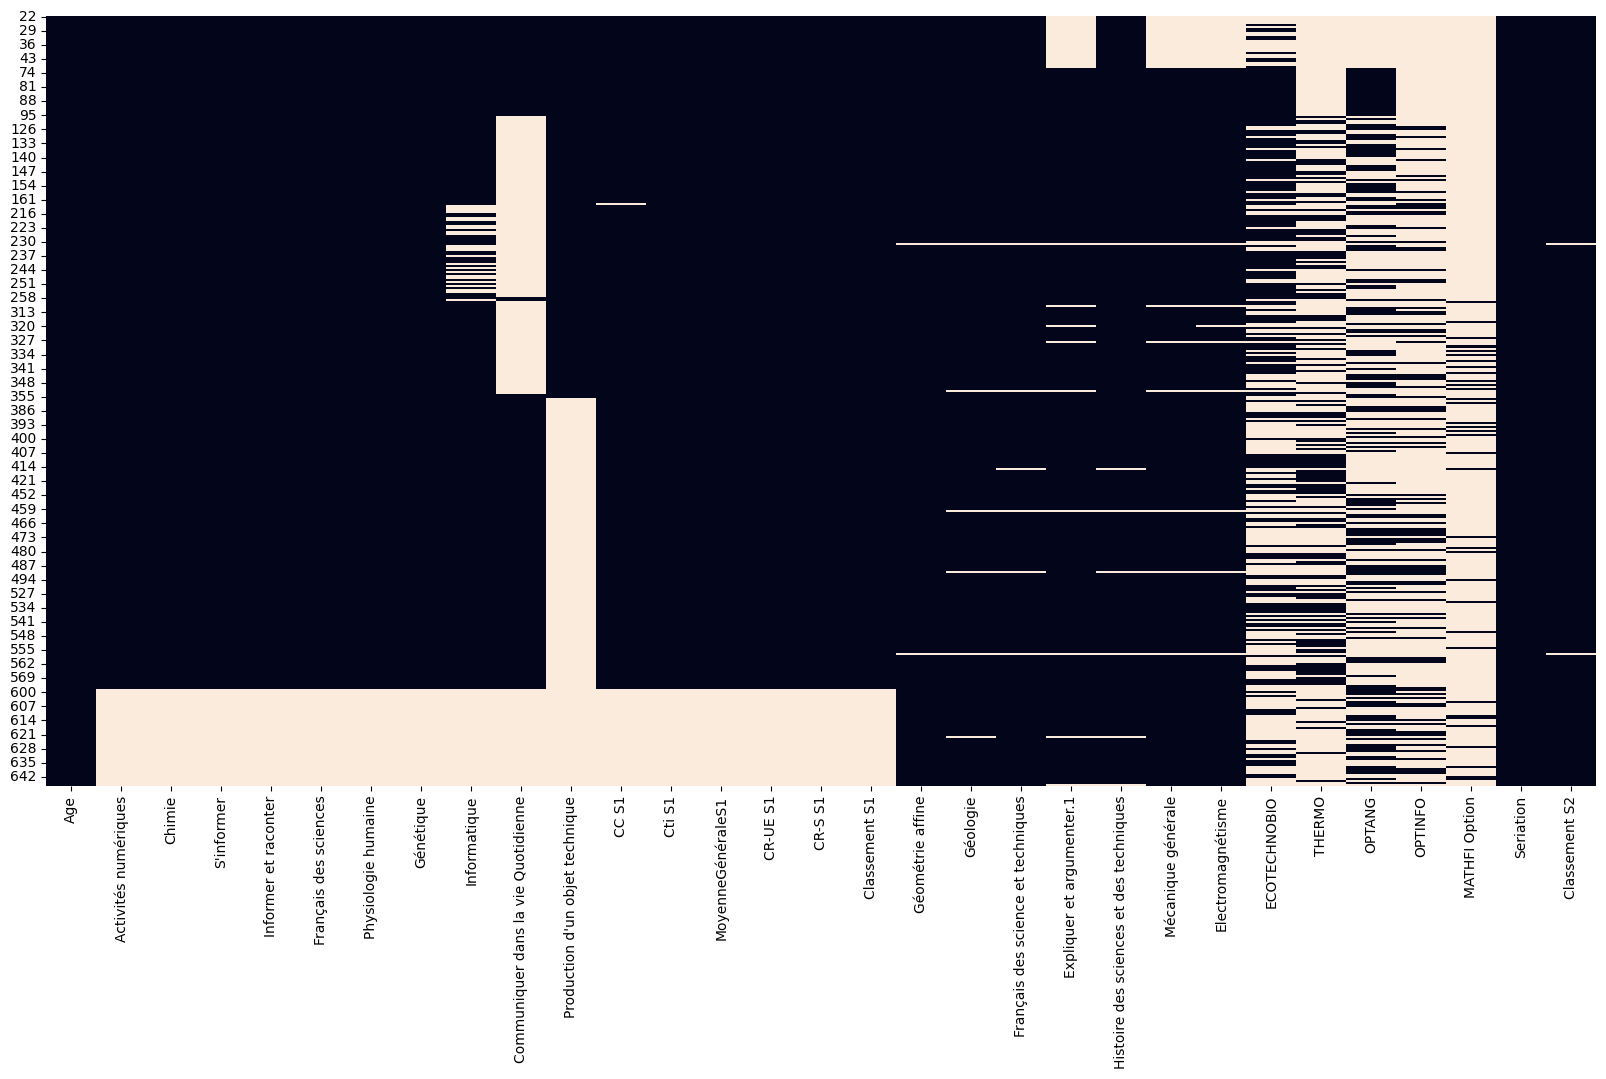

In [50]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    df_numerical.query("`Seriation` == 'S'").dropna(thresh=0.9, axis=1).isna(),
    cbar=False,
)


In [ ]:
df_numerical.query("`Seriation` == 'S'").dropna(thresh=0.9, axis=1)


,Age,Activités numériques,Chimie,S'informer,Informer et raconter,Français des sciences,Physiologie humaine,Génétique,Informatique,Communiquer dans la vie Quotidienne,...,Histoire des sciences et des techniques,Mécanique générale,Electromagnétisme,ECOTECHNOBIO,THERMO,OPTANG,OPTINFO,MATHFI Option,Seriation,Classement S2
22,19.2,10.846875,10.99375,16.182000,15.80,12.4875,12.759722,11.63125,11.750,15.00,...,16.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,1
23,21.5,8.728125,10.05000,12.172500,11.25,9.8125,9.682361,9.45625,6.625,5.25,...,13.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,9
24,19.6,6.540625,9.11250,11.399500,10.10,8.7625,7.606597,8.93125,10.250,13.50,...,14.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,3
25,19.0,8.796875,9.11250,9.631500,15.20,10.8125,10.200000,10.86250,11.500,12.50,...,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,10
26,17.3,9.459375,10.31875,10.308925,10.45,10.4875,8.978125,10.20625,11.750,12.50,...,12.30,NaN,NaN,16.5,NaN,NaN,NaN,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.60,4.225,9.8,14.6,NaN,NaN,NaN,16.6,S,31
643,18.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.35,7.250,16.2,NaN,NaN,8.90,NaN,5.6,S,40
644,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.50,8.400,11.1,NaN,4.0,NaN,NaN,NaN,S,46
645,18.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.60,10.500,10.7,NaN,NaN,12.25,13.8,NaN,S,27


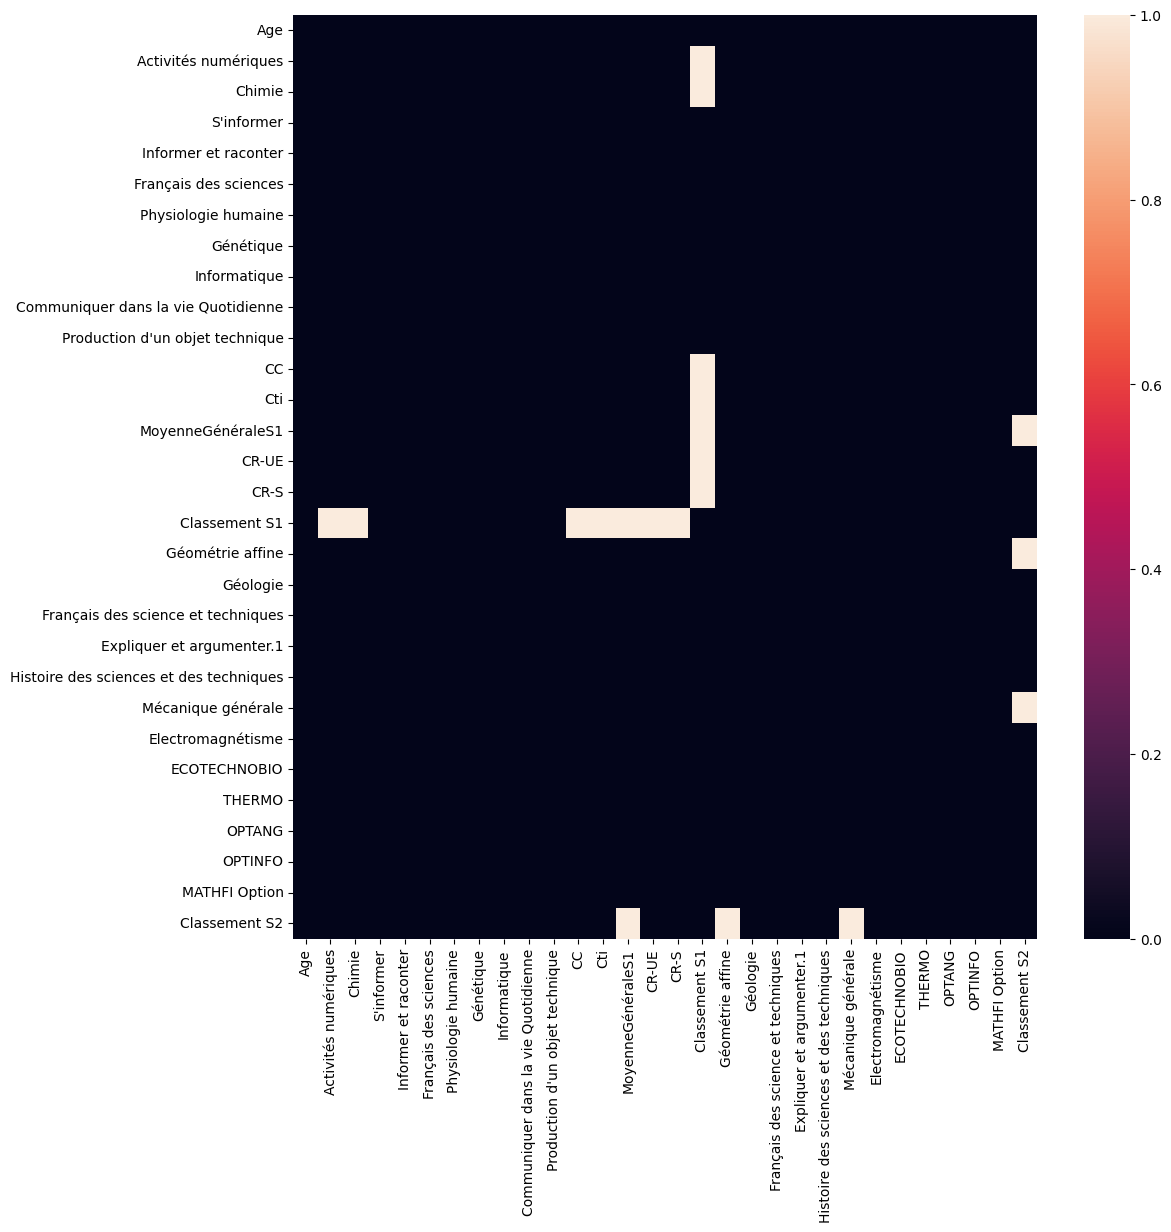

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df_numerical.query("`Seriation` == 'S'")
    .dropna(thresh=0.9, axis=1)
    .drop("Seriation", axis=1)
    .corr()
    < -0.7
)
plt.show()


In [ ]:
df_numerical.query("`Seriation` == 'S'").dropna(thresh=0.9, axis=1).drop(
    "Seriation", axis=1
)


,Age,Activités numériques,Chimie,S'informer,Informer et raconter,Français des sciences,Physiologie humaine,Génétique,Informatique,Communiquer dans la vie Quotidienne,...,Expliquer et argumenter.1,Histoire des sciences et des techniques,Mécanique générale,Electromagnétisme,ECOTECHNOBIO,THERMO,OPTANG,OPTINFO,MATHFI Option,Classement S2
22,19.2,10.846875,10.99375,16.182000,15.80,12.4875,12.759722,11.63125,11.750,15.00,...,NaN,16.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23,21.5,8.728125,10.05000,12.172500,11.25,9.8125,9.682361,9.45625,6.625,5.25,...,NaN,13.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
24,19.6,6.540625,9.11250,11.399500,10.10,8.7625,7.606597,8.93125,10.250,13.50,...,NaN,14.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
25,19.0,8.796875,9.11250,9.631500,15.20,10.8125,10.200000,10.86250,11.500,12.50,...,NaN,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
26,17.3,9.459375,10.31875,10.308925,10.45,10.4875,8.978125,10.20625,11.750,12.50,...,NaN,12.30,NaN,NaN,16.5,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.2,13.60,4.225,9.8,14.6,NaN,NaN,NaN,16.6,31
643,18.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.4,12.35,7.250,16.2,NaN,NaN,8.90,NaN,5.6,40
644,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3,11.50,8.400,11.1,NaN,4.0,NaN,NaN,NaN,46
645,18.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.9,12.60,10.500,10.7,NaN,NaN,12.25,13.8,NaN,27
